Forecasting with Holt-Winter method
This method is another name of Triple Exponential Smoothing. It takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

I am using same Sales Data of Furnitures. The main objective here is to divide the dataset into 2 parts namely train and test section and then evaluate the performance of the model.

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline

In [2]:
df =pd.read_excel("Data/Superstore_Sales_Records.xls", index_col='Order Date',parse_dates=True)
df=df[df["Category"]=="Furniture"]
df=df.groupby(by="Order Date").agg({"Sales":sum})
df.sort_index(inplace=True)
df.head(4)

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_1594/1232888476.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df=df.groupby(by="Order Date").agg({"Sales":sum})


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


Change the resample frequency and make it monthly sales instead of daily

In [3]:
df=df.resample('MS').mean()

df.head()

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


In [ ]:
#Train/test split-80:20

df.shape

(48, 1)

In [6]:
n=len(df)
m=int(n*0.8)

train_data=df.iloc[0:m]
test_data=df.iloc[m:n]

print(f"Total df size {len(df)}")
print(f"Total train data size {len(train_data)}")
print(f"Total test data size {len(test_data)}")

Total df size 48
Total train data size 38
Total test data size 10


In [7]:
train_data.tail()

,Sales
Order Date,
2016-10-01,624.872474
2016-11-01,1271.345152
2016-12-01,1410.719808
2017-01-01,397.602133
2017-02-01,528.179800


In [9]:
test_data

,Sales
Order Date,
2017-03-01,544.672240
2017-04-01,453.297905
2017-05-01,678.302328
2017-06-01,826.460291
2017-07-01,562.524857
2017-08-01,857.881889
2017-09-01,1209.508583
2017-10-01,875.362728
2017-11-01,1277.817759


In [10]:
#fitting the model 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model=ExponentialSmoothing(train_data['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [11]:
# Evaluating aganist test set 

test_prediction =fitted_model.forecast(len(test_data))

In [12]:
test_prediction

2017-03-01     751.363721
2017-04-01     685.457171
2017-05-01     584.215398
2017-06-01     646.029350
2017-07-01     703.944277
2017-08-01     627.291453
2017-09-01    1147.738928
2017-10-01     673.706910
2017-11-01    1171.484311
2017-12-01    1319.224611
Freq: MS, dtype: float64

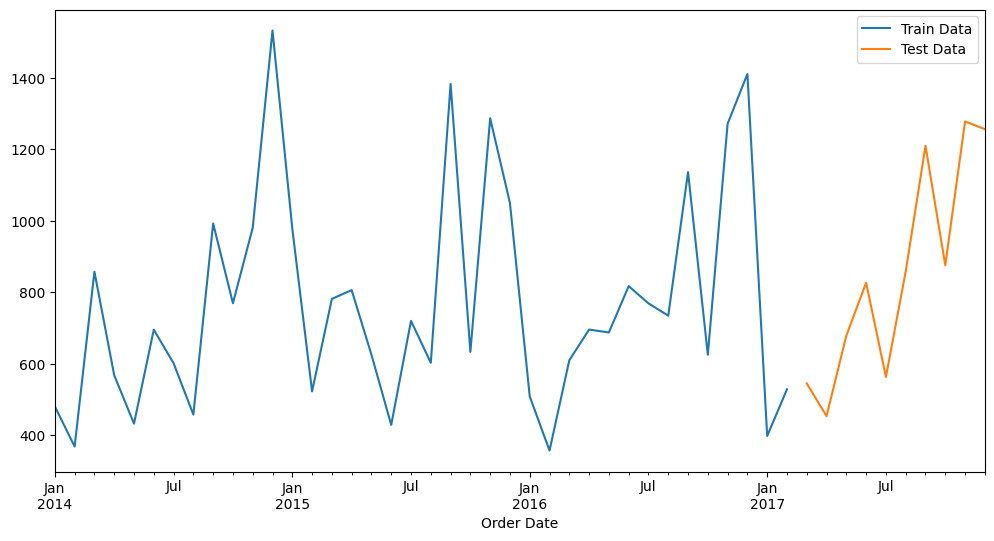

In [13]:
#plot train and test data 
train_data["Sales"].plot(legend=True, label="Train Data")
test_data["Sales"].plot(legend=True,label="Test Data",figsize=(12,6)).autoscale(axis="x",tight=True)


<Axes: xlabel='Order Date'>

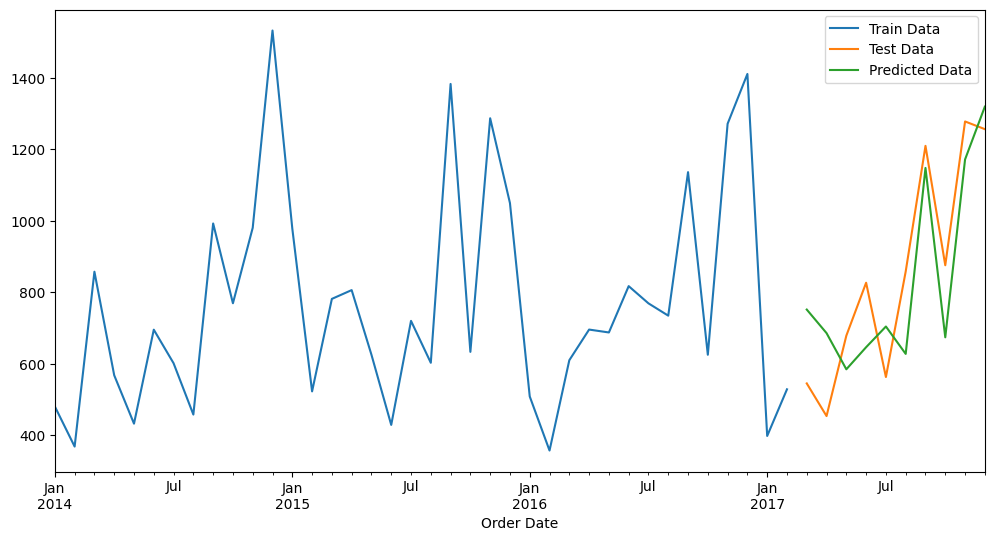

In [15]:
#plot train and test data and predicted value  
train_data["Sales"].plot(legend=True, label="Train Data")
test_data["Sales"].plot(legend=True,label="Test Data",figsize=(12,6)).autoscale(axis="x",tight=True)
test_prediction.plot(legend=True, label="Predicted Data")

Evaluation metrics 

Since this is a type of regression problem we can use regression metrics like Mean Squared Error(MSE) or Root Mean Squared Error(RMSE) or Mean Absolute Error(MAE)


In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [17]:
mae_error = mean_absolute_error(test_data, test_prediction)

print(f"Mean absolute error of the above model is {mae_error}")

Mean absolute error of the above model is 151.80633339174736


In [19]:
mse_error = mean_squared_error(test_data, test_prediction)

print(f"Mean squared error of the above model is {mse_error}")

Mean squared error of the above model is 27094.540466541326


In [20]:
rmse_error = np.sqrt(mean_squared_error(test_data, test_prediction))

print(f"Root mean squared error of the above model is {rmse_error}")

Root mean squared error of the above model is 164.6041933443414


Forecast in future
We evaluated the model by training on train data and testing it on the unknown points to the model. In this section we will see how model's forecast looks on future points which is not even in our test set.

We will train the model on whole dataset and then will try to predict on furure points.

In [21]:
fitted_model=ExponentialSmoothing(df["Sales"],trend="mul",seasonal="mul",seasonal_periods=12).fit()

In [22]:
future_prediction = fitted_model.forecast(12)

In [23]:
future_prediction

2018-01-01     620.869957
2018-02-01     480.968381
2018-03-01     769.204749
2018-04-01     677.107416
2018-05-01     644.979439
2018-06-01     704.020038
2018-07-01     698.469516
2018-08-01     723.854561
2018-09-01    1220.263127
2018-10-01     767.774709
2018-11-01    1244.271812
2018-12-01    1349.945303
Freq: MS, dtype: float64

<Axes: xlabel='Order Date'>

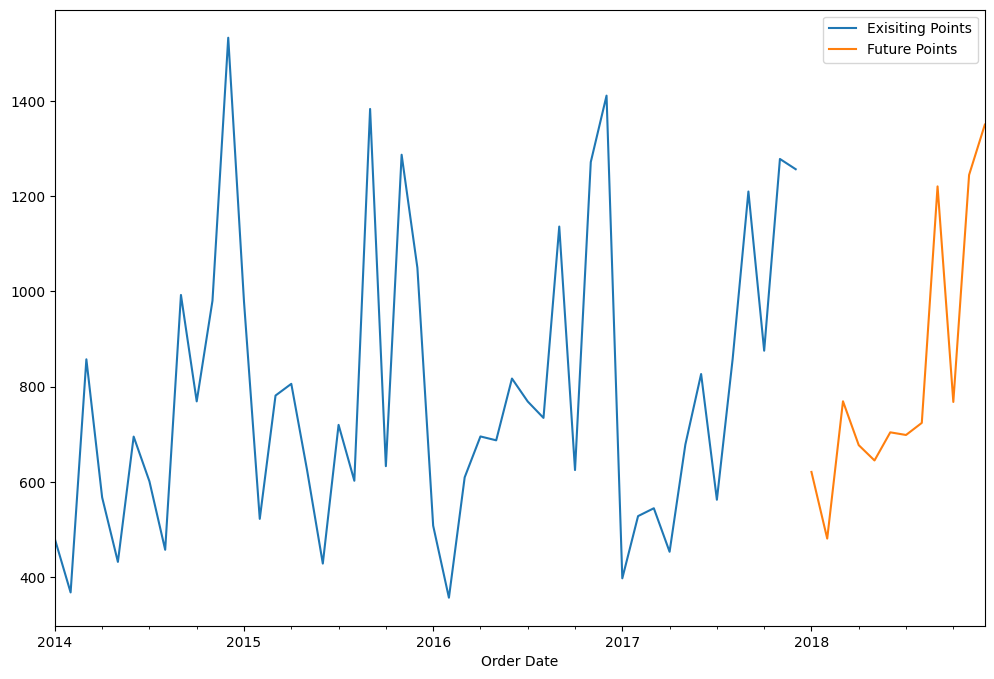

In [24]:
df["Sales"].plot(figsize=(12,8),legend=True,label="Exisiting Points")
future_prediction.plot(figsize=(12,8),legend=True,label="Future Points")

Time series Stationarity and Differencing

Stationarity
Time series said to be stationary if it does not exhibit trends or seasonality i.e fluctuations in the data are entirely due to outside factors and noises

Example:

Samples.csv file contains some dummy data and we can use it to illustrate satationarity.

In [25]:
df=pd.read_csv("Data/samples.csv", index_col=0, parse_dates=True)
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


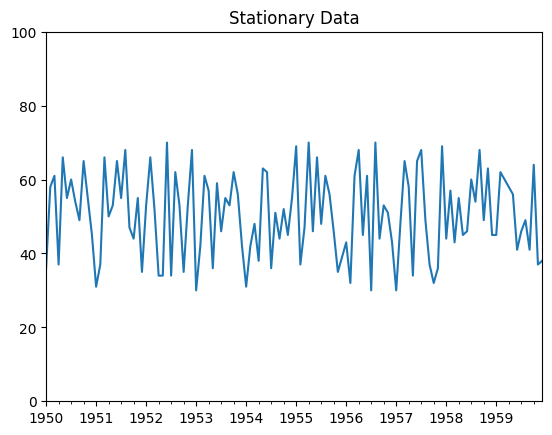

In [26]:
df['a'].plot(ylim=[0,100],title="Stationary Data").autoscale(axis='x',tight=True)


check moving  average attribute for a 

<Axes: title={'center': 'Moving Average'}>

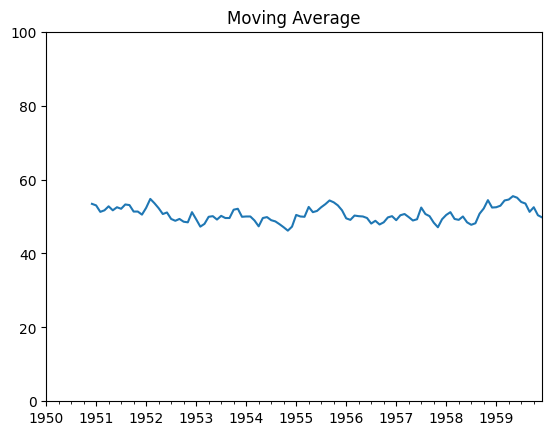

In [27]:
df['a_ma']=df['a'].rolling(12).mean()

df['a_ma'].plot(ylim=[0,100],title="Moving Average")

Mean seems have a nearly constant value 

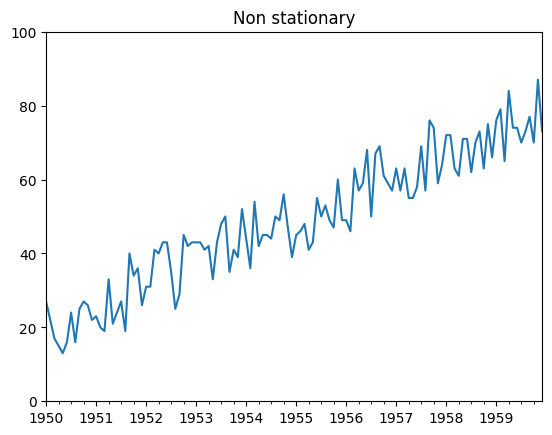

In [30]:
#Non stationary data 

df['b'].plot(ylim=[0,100],title="Non stationary").autoscale(axis='x',tight=True)

<Axes: title={'center': 'Moving average'}>

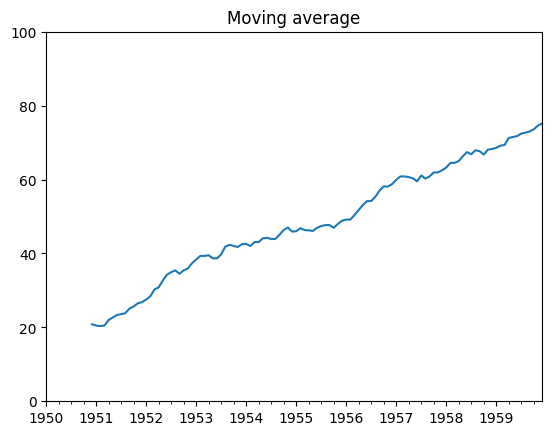

In [31]:
# calculate the moving average with window size 12.

df['b_ma']=df['b'].rolling(12).mean()
df['b_ma'].plot(ylim=[0,100],title="Moving average") 

Mean does not seem same between two equidistance time stamp 

Differencing
Non-stationary data can be made to look stationary through differencing. A simple differencing method calculates the difference between consecutive points.

Related Functions:
statespace.tools.diff(series[, k_diff, …])  Difference a series simply and/or seasonally along the zero-th axis.

In [32]:
from statsmodels.tsa.statespace.tools import diff

df['d1']=diff(df['b'],k_diff=1)



In [34]:
df.head(10)

,a,b,c,d,a_ma,b_ma,d1
1950-01-01,36,27,0,67,NaN,NaN,NaN
1950-02-01,58,22,3,31,NaN,NaN,-5.0
1950-03-01,61,17,5,67,NaN,NaN,-5.0
1950-04-01,37,15,8,47,NaN,NaN,-2.0
1950-05-01,66,13,8,62,NaN,NaN,-2.0
1950-06-01,55,16,19,60,NaN,NaN,3.0
1950-07-01,60,24,24,53,NaN,NaN,8.0
1950-08-01,54,16,33,71,NaN,NaN,-8.0
1950-09-01,49,25,44,63,NaN,NaN,9.0
1950-10-01,65,27,60,46,NaN,NaN,2.0


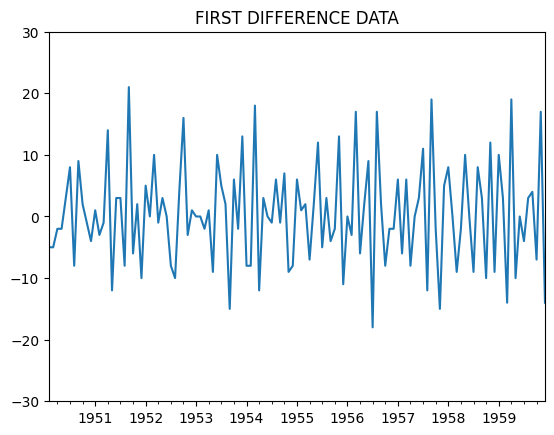

In [35]:
df['d1'].plot(title="FIRST DIFFERENCE DATA", ylim=[-30, 30]).autoscale(axis='x',tight=True)

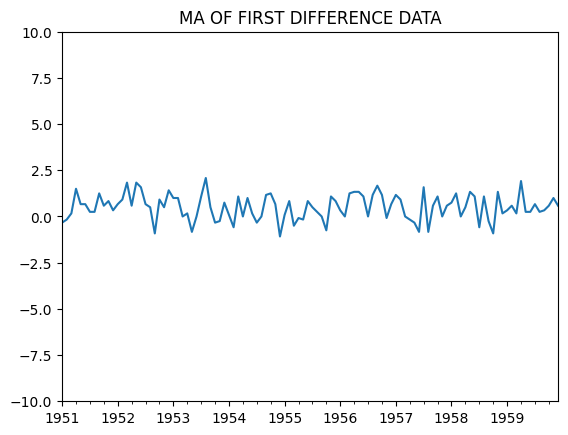

In [36]:
#lets check the moving average for this series.

df['d1_ma']=df['d1'].rolling(12).mean()
df['d1_ma'].plot(title="MA OF FIRST DIFFERENCE DATA", ylim=[-10, 10]).autoscale(axis='x',tight=True)


Autocorrelation function/Partial autocorrelation function

We need to look at covariance and correlation as they relate to lagged (shifted) samples of a time series.

Contents:

ACF and PACF charts

Create these charts for multiple times series, one with seasonality and another without

Calculate Orders PQD terms for ARIMA off charts

Related Functions:
stattools.acovf(x[, unbiased, demean, fft, …]) Autocovariance for 1D

stattools.acf(x[, unbiased, nlags, qstat, …])  Autocorrelation function for 1d arrays

stattools.pacf(x[, nlags, method, alpha])      Partial autocorrelation estimated

stattools.pacf_yw(x[, nlags, method])          Partial autocorrelation estimated with non-recursive yule_walker

stattools.pacf_ols(x[, nlags])                 Calculate partial autocorrelations

Related Plot Methods:

tsaplots.plot_acf(x)   Plot the autocorrelation function

tsaplots.plot_pacf(x)  Plot the partial autocorrelation function

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import statsmodels.api as sm 

In [2]:
import warnings
warnings.filterwarnings('ignore')

![Screenshot 2025-04-02 at 9.35.55 AM.png](<attachment:Screenshot 2025-04-02 at 9.35.55 AM.png>)
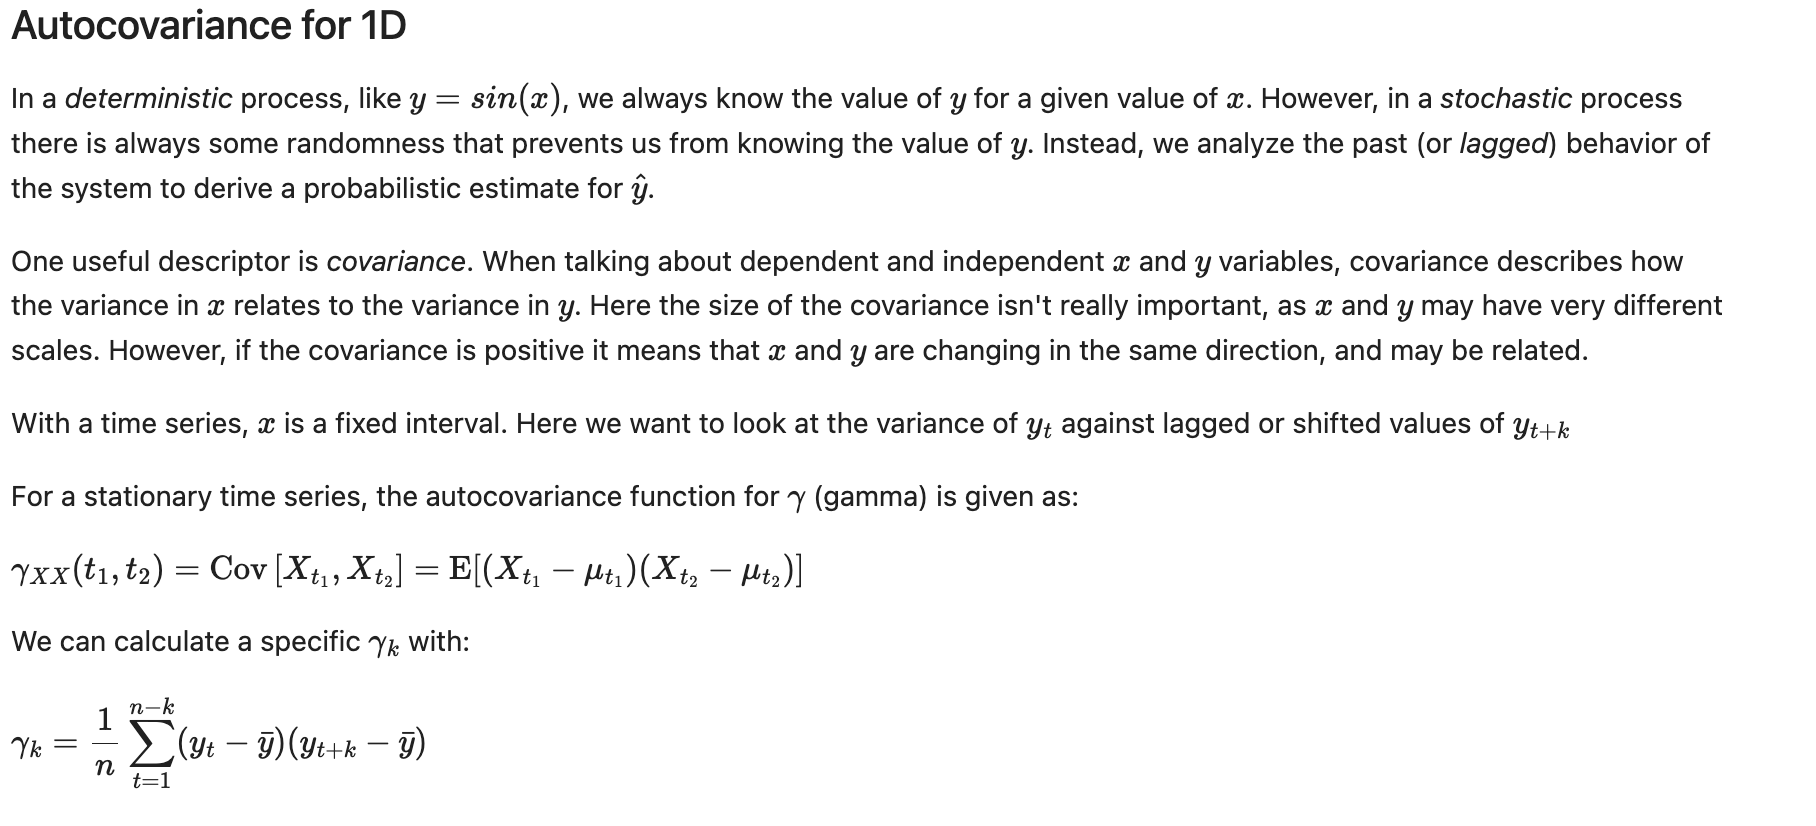

<Axes: >

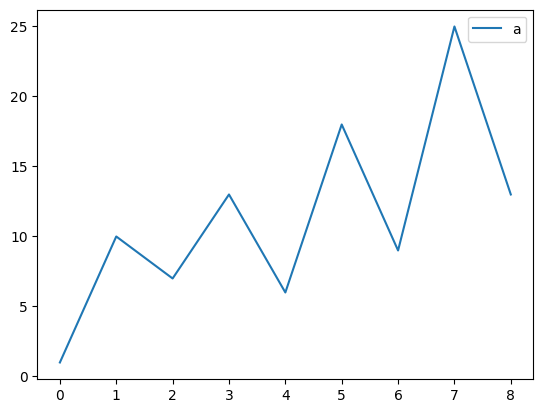

In [3]:
#example 
df=pd.DataFrame({'a':[1,10,7,13,6,18,9,25,13]})

df.plot()

Unbiased autocovariance
Note that the number of terms in the calculations above are decreasing. Statsmodels can return an "unbiased" autocovariance where instead of dividing by n instaed of n-k 
.

In [5]:
from statsmodels.tsa.stattools import acovf, acf
arr = acovf(df['a'])

arr

array([ 44.22222222,  -6.30864198,  19.60493827, -11.62962963,
         7.80246914, -13.58024691,  -0.14814815, -15.9382716 ,
        -1.91358025])

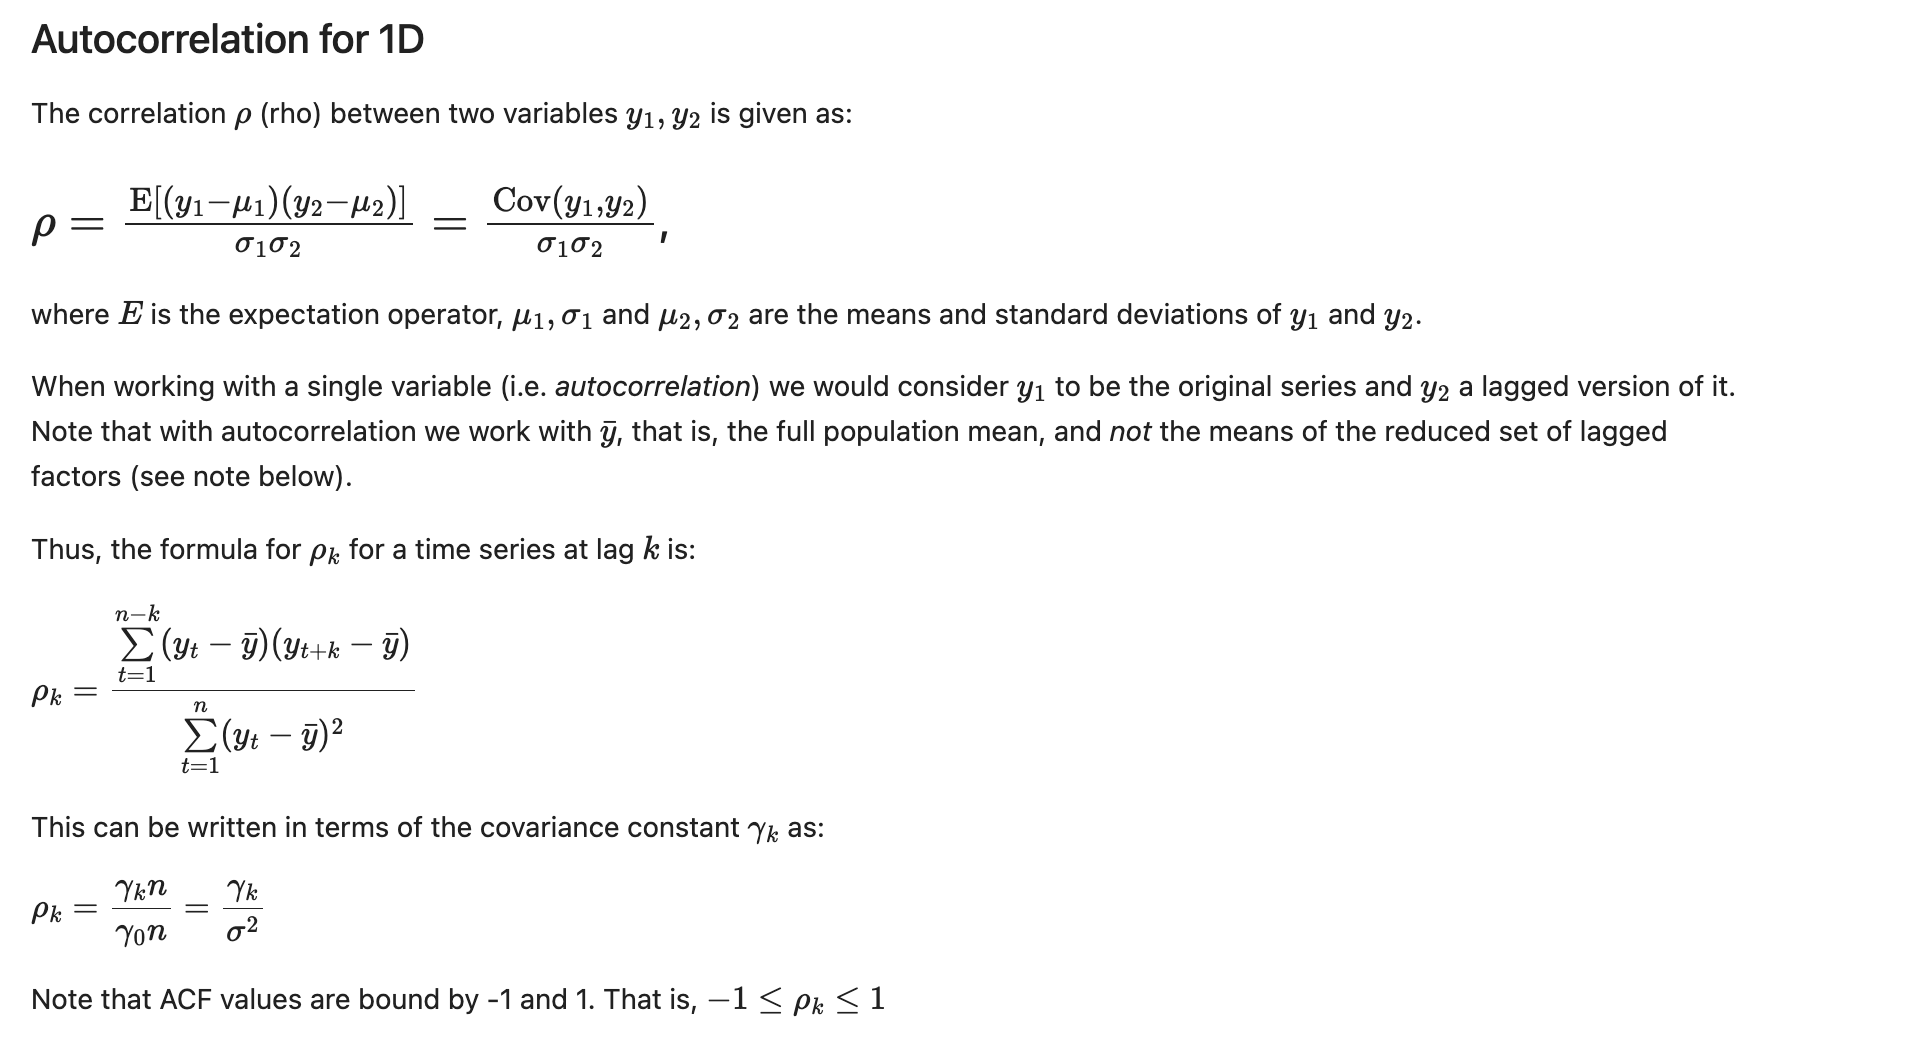

In [6]:
arr3 = acf(df['a'])

arr3

array([ 1.        , -0.14265773,  0.44332775, -0.26298157,  0.17643774,
       -0.30709101, -0.00335008, -0.36041318, -0.04327192])

Partial Autocorrelation
Partial autocorrelations measure the linear dependence of one variable after removing the effect of other variable(s) that affect both variables. That is, the partial autocorrelation at lag 
 is the autocorrelation between 
 and 
 that is not accounted for by lags 
 through 
.

In [7]:
from statsmodels.tsa.stattools import pacf_yw
arr4 = pacf_yw(df['a'],nlags=4,method='mle')
arr4

array([ 1.        , -0.14265773,  0.43176344, -0.20758442, -0.04572862])

NOTE: We passed in method='mle' above in order to use biased ACF coefficients. "mle" stands for "maximum likelihood estimation". Alternatively we can pass method='unbiased' (the statsmodels default):

In [8]:
arr4 = pacf_yw(df['a'],nlags=4,method='adjusted')
arr4

array([ 1.        , -0.16048995,  0.5586243 , -0.39456104,  0.01906252])

Partial autocrrelation with OLS
This provides partial autocorrelations with ordinary least squares (OLS) estimates for each lag instead of Yule-Walker.

In [9]:
from statsmodels.tsa.stattools import pacf_ols
arr5 = pacf_ols(df['a'],nlags=4)
arr5

array([ 1.        , -0.13833492,  1.13495418, -0.04476691,  0.5979815 ])

In [10]:
from pandas.plotting import lag_plot

In [11]:
df = pd.read_excel('Data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [13]:
#plot the sales data of Office Supplies
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Office Supplies']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340


In [14]:
df = df.resample('W').sum()

df.head()

,Sales
Order Date,
2014-01-05,324.044
2014-01-12,708.004
2014-01-19,2337.764
2014-01-26,1143.170
2014-02-02,368.784


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

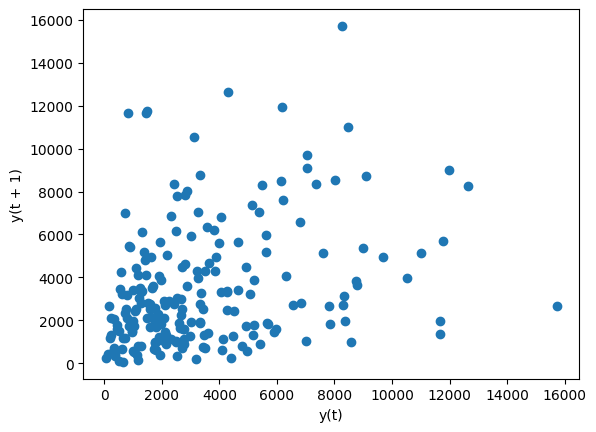

In [15]:
lag_plot(df['Sales'])

This does not show strong relationship since the time series is nearly stationary.

ACF Plots

Plotting the magnitude of the autocorrelations over the first few (20-40) lags can say a lot about time series.



In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [17]:
acf(df['Sales'])

array([ 1.00000000e+00,  3.12440082e-01,  2.49173025e-01,  1.39336867e-01,
        1.84489786e-01,  1.67531418e-01,  1.11379734e-01,  1.84930768e-01,
        8.24198806e-02,  8.74684994e-02,  4.89924777e-02,  6.22098365e-02,
        1.65448013e-01,  1.49072360e-01,  7.97573259e-02,  7.65911202e-02,
        7.55594141e-02, -7.46386648e-04,  4.97054222e-02, -2.10402529e-02,
       -2.49880823e-02, -6.68093251e-02, -1.79718855e-02, -3.42941758e-02])

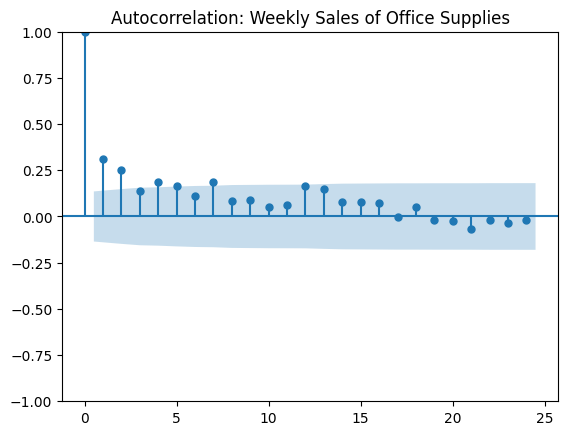

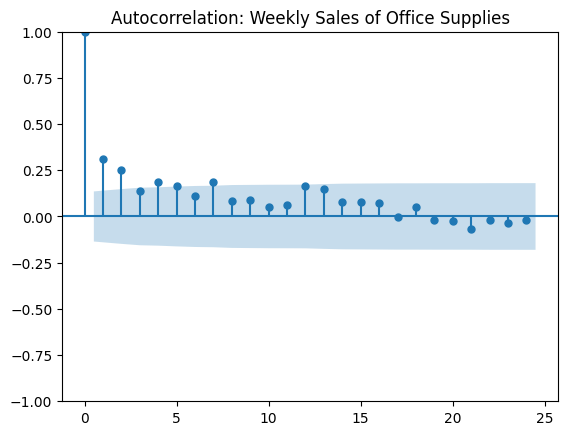

In [18]:
title = 'Autocorrelation: Weekly Sales of Office Supplies'
plot_acf(df['Sales'], title=title)

ACF (Autocorrelation Function): The ACF is a way of measuring the correlation between a time series and a lagged version of itself. It shows you how related observations are to each other at different time lags.

Stationary Data: The statement about "stationary data" refers to a time series that has constant statistical properties over time. Specifically:

The mean and variance are constant over time.

The autocovariance (correlation) between values only depends on the time difference (lag), not on the specific time at which you measure it.

ACF Plot Structure:

The x-axis represents the lags (the number of previous observations you are comparing to the current one).

The y-axis represents the autocorrelation values (how strongly correlated the values are at each lag).

The first value is always 1 because it represents the correlation of the series with itself at lag 0 (perfect correlation).

A sharp dropoff means that past values of the series (e.g., sales from earlier weeks) do not have a long-lasting relationship with the current value. This suggests that there is no significant autoregressive (AR) component in the data, meaning past values of the time series don't predict future values very well.

3. Interpretation
"Sharp dropoff indicates that there is no AR component": This part means that if the autocorrelation drops quickly to near zero after the first few lags, it suggests the data doesn't exhibit significant autoregressive behavior. In other words, the current sales data isn't strongly predicted by past sales after a certain number of weeks.

An AR (Autoregressive) component in a time series model like ARIMA would imply that past values have a direct influence on future values. If the autocorrelation decays rapidly, it's an indication that the time series doesn't follow an autoregressive structure, and hence, an AR term may not be necessary for your ARIMA model.

4. Conclusion
The ACF plot helps you determine whether your data has significant autocorrelation at certain lags. If the ACF decays quickly, as the statement suggests, it may indicate that your time series doesn't require an AR (autoregressive) component in a potential ARIMA model.

PACF Plots

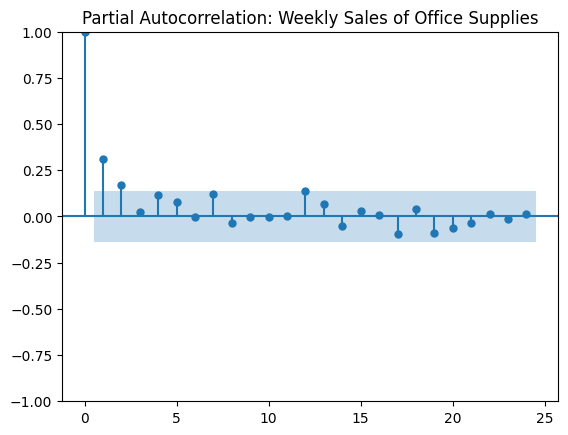

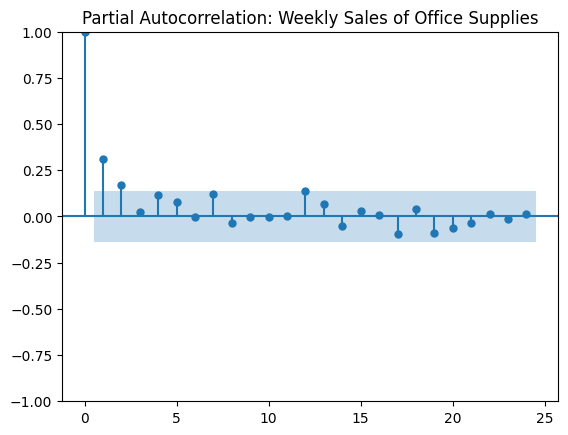

In [19]:
title = 'Partial Autocorrelation: Weekly Sales of Office Supplies'
plot_pacf(df['Sales'], title=title)

Autoregressive Model

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline 

In [3]:
from statsmodels.tsa.ar_model import AR, ARResults 

#plot the sales data of Office Supplies
df = pd.read_excel('Data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_3389/2084432131.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = df.groupby(by='Order Date').agg({'Sales':sum})


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [4]:
df = df.resample('M').sum()

df.head()

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_3389/1205556951.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()


,Sales
Order Date,
2014-01-31,6242.525
2014-02-28,1839.658
2014-03-31,14573.956
2014-04-30,7944.837
2014-05-31,6912.787


[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Sales Data')]

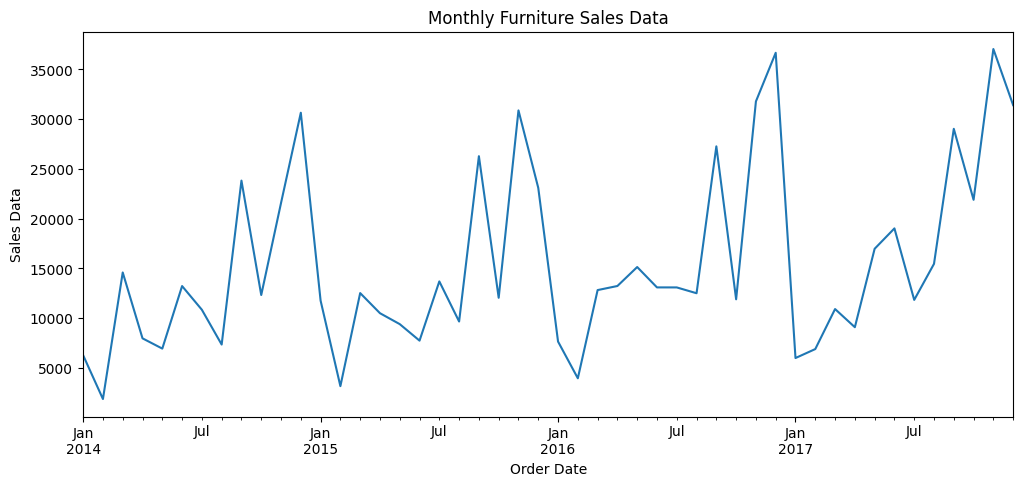

In [5]:
title='Monthly Furniture Sales Data'
ylabel='Sales Data'
xlabel='Order Date'

ax = df['Sales'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

Split the data into train/test sets
The goal in this section is to:

Split known data into a training set of records on which to fit the model
Use the remaining records for testing, to evaluate the model
Fit the model again on the full set of records
Predict a future set of values using the model
As a general rule you should set the length of your test set equal to your intended forecast size. That is, for a monthly dataset you might want to forecast out one more year. Therefore your test set should be one year long.

In [6]:
len(df)

48

In [7]:
train = df.iloc[:len(df)-6]
test = df.iloc[len(df)-6:]

print(f"Train size is {len(train)}")
print(f"Test size is {len(test)}")

Train size is 42
Test size is 6


In [8]:
train

,Sales
Order Date,
2014-01-31,6242.5250
2014-02-28,1839.6580
2014-03-31,14573.9560
2014-04-30,7944.8370
2014-05-31,6912.7870
2014-06-30,13206.1256
2014-07-31,10821.0510
2014-08-31,7320.3465
2014-09-30,23816.4808


In [9]:
test

,Sales
Order Date,
2017-07-31,11813.0220
2017-08-31,15441.8740
2017-09-30,29028.2060
2017-10-31,21884.0682
2017-11-30,37056.7150
2017-12-31,31407.4668


In [11]:
#Model's fitting

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.ar_model import AutoReg



In [13]:
model1=AutoReg(train['Sales'],1,old_names=False)
result_1=model1.fit()
print(result_1.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     AutoReg(1)   Log Likelihood                -427.247
Method:               Conditional MLE   S.D. of innovations           8116.944
Date:                Sun, 06 Apr 2025   AIC                            860.493
Time:                        12:40:06   BIC                            865.634
Sample:                    02-28-2014   HQIC                           862.365
                         - 06-30-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.172e+04   2487.380      4.712      0.000    6845.693    1.66e+04
Sales.L1       0.1884      0.152      1.237      0.216      -0.110       0.487
                                    Roots           

Dep. Variable: Sales

The dependent variable in this model is Sales, which means you're trying to predict or model sales data using the autoregressive approach.

No. Observations: 42

The model was fitted using 42 observations (data points) from the time series.

Model: AutoReg(1)

The model used is an autoregressive model of order 1 (AR(1)), meaning it uses 1 lag (previous value) of the series to predict the current value.

Log Likelihood: -425.369

The log likelihood is a measure of how well the model fits the data. A higher log likelihood value (closer to 0) typically indicates a better fit. In this case, it’s negative, which is normal since log likelihood values are usually negative.

Method: Conditional MLE

The method used to estimate the parameters of the autoregressive model is Conditional Maximum Likelihood Estimation (MLE). This is a common approach to estimating parameters in time series models.

S.D. of innovations: 7753.664

This is the standard deviation of the residuals (also known as innovations). It represents the variability of the data that the model cannot explain.

Information Criteria:
AIC (Akaike Information Criterion): 856.738

BIC (Bayesian Information Criterion): 861.879

HQIC (Hannan-Quinn Information Criterion): 858.610

These values are used for model selection. Lower values generally indicate a better-fitting model, as these criteria penalize the complexity of the model (i.e., the number of parameters). A lower AIC, BIC, and HQIC suggests a better model.

const (Intercept):

Coefficient: 1.128e+04 or 11,280

This is the intercept of the model, i.e., the value of Sales when all other variables (lags) are zero. This represents a baseline level of sales when considering past sales data.

Standard Error: 2434.613 — this measures the uncertainty around the coefficient estimate.

Z-statistic: 4.631 — the value of the coefficient divided by its standard error. A higher value typically means the coefficient is statistically significant.

P>|z|: 0.000 — the p-value for the test that the coefficient is different from zero. A value less than 0.05 (often used as a threshold) suggests that the coefficient is statistically significant.

The confidence interval for const is between 6,503.709 and 16,000.

Sales.L1 (Lag 1):

Coefficient: 0.2133

This represents the effect of the previous period's sales (Sales.L1) on the current period's sales. It means that a 1-unit increase in the previous sales is expected to result in a 0.2133 increase in the current sales.

Standard Error: 0.150 — the standard error of the coefficient.

Z-statistic: 1.419 — the test statistic for checking if the coefficient is different from zero.

P>|z|: 0.156 — the p-value for this coefficient is greater than 0.05, indicating that the lagged sales value is not statistically significant at the 5% significance level.

The confidence interval for Sales.L1 is between -0.081 and 0.508.



In [15]:
print(f'lag:{result_1.arfreq}')
print(f"coffecient:{result_1.params}")

lag:[0.]
coffecient:const       11720.868755
Sales.L1        0.188372
dtype: float64


In [16]:
start=len(train)
end=len(train)+len(test)-1
prediction=result_1.predict(start=start,end=end,dynamic=False).rename("AR(1).prediction")

dynamic=False argument means that predictions are made using only past values from the training set. If dynamic=True, the model would use its own previous predictions for generating future predictions (dynamic forecasting), which can introduce more uncertainty in longer-term forecasts.

In [17]:
prediction

2017-07-31    15301.562179
2017-08-31    14603.261009
2017-09-30    14471.720330
2017-10-31    14446.941694
2017-11-30    14442.274083
2017-12-31    14441.394833
Freq: ME, Name: AR(1).prediction, dtype: float64

In [18]:
##Comparing predictions to expected values
for i in range(len(prediction)):
    print(f'predition value: {prediction[i]}', f'actual_value: {test["Sales"][i]}')

predition value: 15301.5621785636 actual_value: 11813.021999999999
predition value: 14603.26100898213 actual_value: 15441.874
predition value: 14471.720329761076 actual_value: 29028.206000000002
predition value: 14446.941694061084 actual_value: 21884.0682
predition value: 14442.274082560303 actual_value: 37056.715
predition value: 14441.394833299528 actual_value: 31407.4668


<Axes: xlabel='Order Date'>

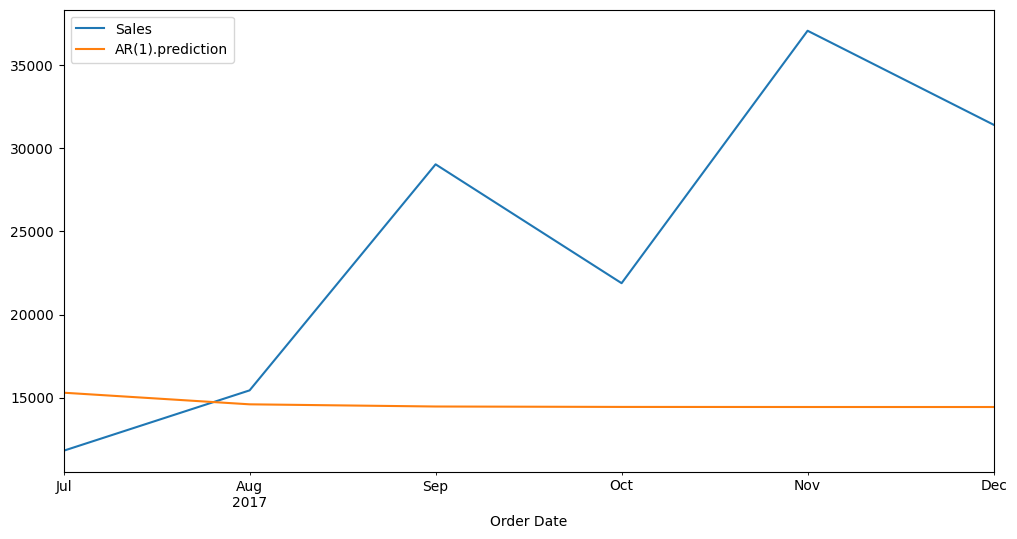

In [19]:
test["Sales"].plot(legend=True)
prediction.plot(legend=True,figsize=(12,6))

In [20]:
model2=AutoReg(train["Sales"],6)
result_2= model2.fit()
print(result_2.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     AutoReg(6)   Log Likelihood                -373.443
Method:               Conditional MLE   S.D. of innovations           7742.555
Date:                Sun, 06 Apr 2025   AIC                            762.887
Time:                        12:57:41   BIC                            775.555
Sample:                    07-31-2014   HQIC                           767.308
                         - 06-30-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.93e+04   5788.110      3.334      0.001    7950.646    3.06e+04
Sales.L1       0.1277      0.165      0.774      0.439      -0.196       0.451
Sales.L2      -0.0805      0.162     -0.496      0.6

In [22]:
start=len(train)
end=len(train)+len(test)-1
prediction_2=result_2.predict(start=start,end=end, dynamic=False).rename("Ar(6) prediction")

In [23]:
prediction_2

2017-07-31    17121.629045
2017-08-31    16914.370614
2017-09-30    15703.623235
2017-10-31    13359.612451
2017-11-30    13669.199630
2017-12-31    14347.505858
Freq: ME, Name: Ar(6) prediction, dtype: float64

In [25]:
for i in range(len(prediction_2)):
    print(f"prediction_value:{prediction_2[i]}", f"Actual_value:{test["Sales"][i]}")

prediction_value:17121.629045474758 Actual_value:11813.021999999999
prediction_value:16914.370613564082 Actual_value:15441.874
prediction_value:15703.623234556038 Actual_value:29028.206000000002
prediction_value:13359.612450516706 Actual_value:21884.0682
prediction_value:13669.199629693907 Actual_value:37056.715
prediction_value:14347.505857765354 Actual_value:31407.4668


<Axes: xlabel='Order Date'>

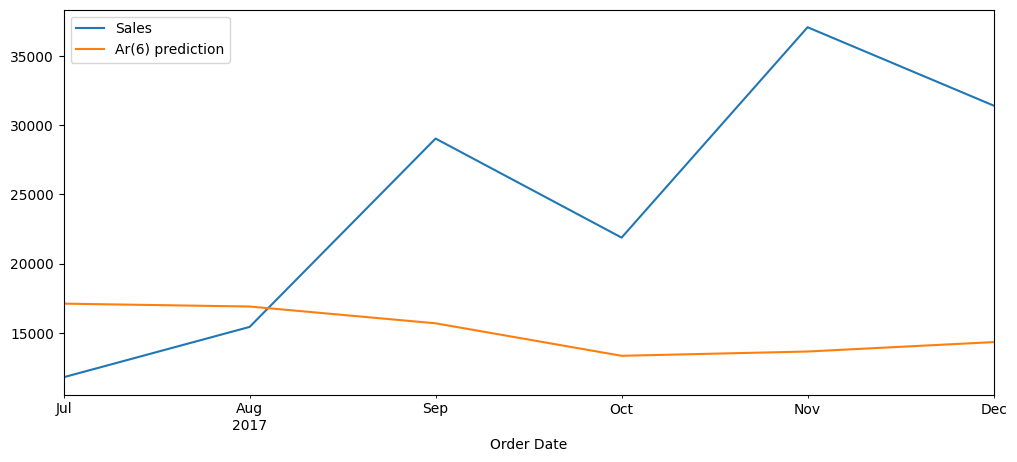

In [26]:
test["Sales"].plot(legend=True)
prediction_2.plot(legend=True,figsize=(12,5))

Instead of choosing the order(p), we can let statsmodel to find out best p value for us.

Fit an AR(p) model

In [27]:
from statsmodels.tsa.ar_model import ar_select_order

p=ar_select_order(train["Sales"], maxlag=15)

p.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [33]:
for i in p.aic:  # Iterate over the lag orders (1 to maxlag)
    print(f"Lag {i}: AIC = {p.aic[i]}")

Lag (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): AIC = 550.7589374141272
Lag (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13): AIC = 551.5782104244183
Lag (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14): AIC = 553.0533163359365
Lag (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15): AIC = 554.86376812916
Lag 0: AIC = 566.754262406713
Lag (1,): AIC = 568.0171886454209
Lag (1, 2): AIC = 569.9873125564161
Lag (1, 2, 3): AIC = 571.9705955079081
Lag (1, 2, 3, 4): AIC = 572.1639314079097
Lag (1, 2, 3, 4, 5): AIC = 573.0031093684461
Lag (1, 2, 3, 4, 5, 6, 7): AIC = 574.8605889895969
Lag (1, 2, 3, 4, 5, 6): AIC = 574.9519953669693
Lag (1, 2, 3, 4, 5, 6, 7, 8): AIC = 576.2881884807466
Lag (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): AIC = 576.9304915411634
Lag (1, 2, 3, 4, 5, 6, 7, 8, 9): AIC = 577.2314175391331
Lag (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): AIC = 578.9281719864982


In [35]:
for i in p.bic:
    print(f"Lag {i}: bIC = {p.bic[i]}")

Lag (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): bIC = 567.6048166721835
Lag 0: bIC = 568.0500992727174
Lag (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13): bIC = 569.719926548479
Lag (1,): bIC = 570.6088623774295
Lag (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14): bIC = 572.4908693260014
Lag (1, 2): bIC = 573.8748231544291
Lag (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15): bIC = 575.5971579852293
Lag (1, 2, 3): bIC = 577.1539429719254
Lag (1, 2, 3, 4): bIC = 578.6431157379313
Lag (1, 2, 3, 4, 5): bIC = 580.778130564472
Lag (1, 2, 3, 4, 5, 6): bIC = 584.0228534289996
Lag (1, 2, 3, 4, 5, 6, 7): bIC = 585.2272839176314
Lag (1, 2, 3, 4, 5, 6, 7, 8): bIC = 587.9507202747856
Lag (1, 2, 3, 4, 5, 6, 7, 8, 9): bIC = 590.1897861991764
Lag (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): bIC = 591.184697067211
Lag (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): bIC = 594.4782143785502


In [36]:
#Fit the model with p as 12

mod12 = AutoReg(train['Sales'], 12)
res12 = mod12.fit()
print(res12.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   42
Model:                    AutoReg(12)   Log Likelihood                -290.930
Method:               Conditional MLE   S.D. of innovations           3939.183
Date:                Sun, 06 Apr 2025   AIC                            609.860
Time:                        13:16:55   BIC                            629.477
Sample:                    01-31-2015   HQIC                           616.136
                         - 06-30-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6179.8244   9948.341      0.621      0.534   -1.33e+04    2.57e+04
Sales.L1       0.0175      0.102      0.172      0.864      -0.182       0.217
Sales.L2      -0.0058      0.104     -0.056      0.9

In [37]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions12 = res12.predict(start=start, end=end, dynamic=False).rename('AR(6) Predictions')

<Axes: xlabel='Order Date'>

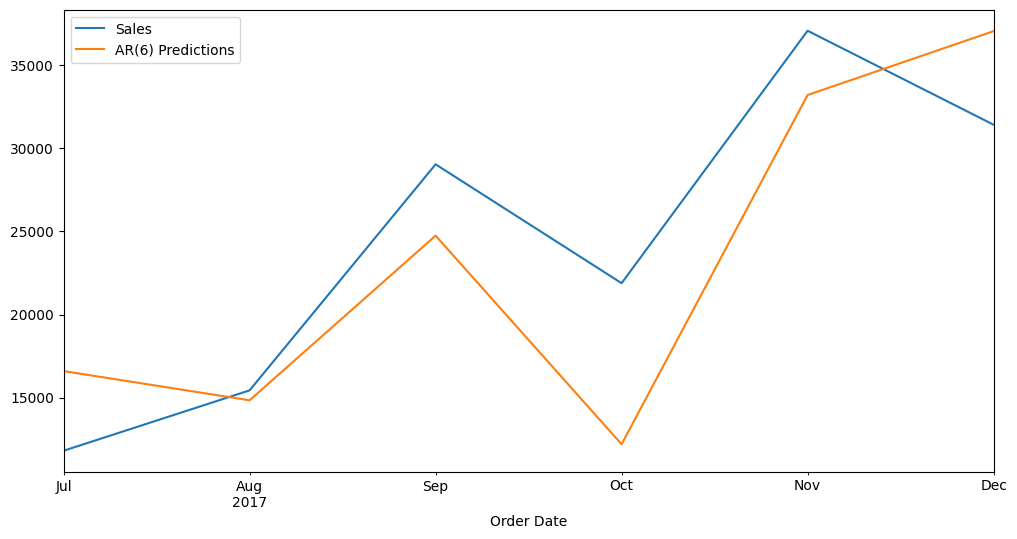

In [38]:
test['Sales'].plot(legend=True)
predictions12.plot(legend=True,figsize=(12,6))

This seems far better than earlier models with order 6 and 1

In [42]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(6)','AR(12)']
preds = [prediction, prediction_2, predictions12]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['Sales'], preds[i])
    print(f'{labels[i]} Error: {error}')

AR(1) Error: 179889307.6744995
AR(6) Error: 186429758.2141937
AR(12) Error: 30320630.653732415


Clearly model AR(12) outperform the other models with lower order.

Another method is the Akaike information criterion (AIC), which does a better job of evaluating models by avoiding overfitting.
Fortunately this is available directly from the fit model object.

In [44]:
modls = [result_1,result_2,res12]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic}')

AR(1) AIC: 860.4931005641604
AR(6) AIC: 762.8866377863142
AR(12) AIC: 609.8600352874028


Forecasting in future
Now we are ready to train our model whole data and predict thje future sales.


In [45]:
#fit the model over whole data
mod12 = AutoReg(df['Sales'], 12)
res12 = mod12.fit()
print(res12.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   48
Model:                    AutoReg(12)   Log Likelihood                -349.076
Method:               Conditional MLE   S.D. of innovations           3934.790
Date:                Sun, 06 Apr 2025   AIC                            726.152
Time:                        13:20:38   BIC                            748.321
Sample:                    01-31-2015   HQIC                           733.889
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4356.0138   7562.612      0.576      0.565   -1.05e+04    1.92e+04
Sales.L1       0.0321      0.088      0.366      0.715      -0.140       0.204
Sales.L2      -0.0097      0.094     -0.102      0.9

In [46]:
start = len(df)
end = len(df)+12

pred_future = res12.predict(start=start, end=end, dynamic=False)

pred_future

2018-01-31     6022.626972
2018-02-28     5739.250407
2018-03-31     9199.016790
2018-04-30     9976.759362
2018-05-31    19661.613494
2018-06-30    20722.318428
2018-07-31    13609.961837
2018-08-31    18080.731150
2018-09-30    29604.129926
2018-10-31    26437.359412
2018-11-30    39227.722049
2018-12-31    29781.186936
2019-01-31     5288.024913
Freq: ME, dtype: float64

<Axes: xlabel='Order Date'>

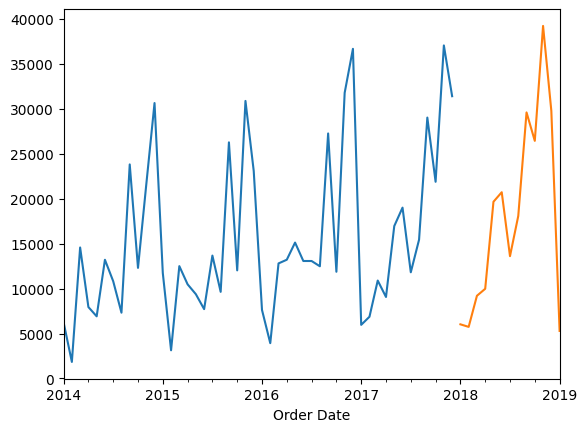

In [47]:
df['Sales'].plot()
pred_future.plot()

Autoregressive Moving Average(ARMA) Model

It's a class of time series models used for analyzing and forecasting time-dependent data. ARMA models are used to describe and capture the patterns and dependencies present in a time series dataset. They combine autoregressive (AR) and moving average (MA) components.

Related Functions:

arima_model.ARMA(endog, order[, exog, …])     Autoregressive Moving Average ARMA(p,q) model

arima_model.ARMAResults(model, params[, …])   Class to hold results from fitting an ARMA model

kalmanf.kalmanfilter.KalmanFilter             Kalman Filter code intended for use with the ARMA model

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
#from pmdarima import auto_arima # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#plot the sales data of Office Supplies
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [3]:
df = df.resample('MS').sum()

In [4]:
df.head()

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


Automate the augmented Dickey-Fuller Test
To check if the series is stationary let's write a function that perform the augmented Dickey-Fuller Test.

In [6]:
from statsmodels.tsa.stattools import adfuller

In [5]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

<Axes: xlabel='Order Date'>

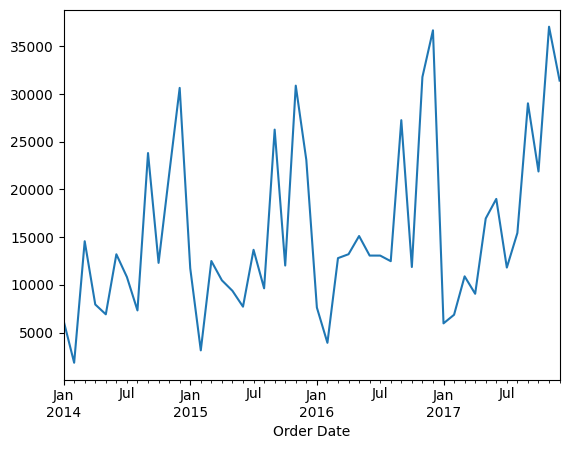

In [7]:
df['Sales'].plot()

In [8]:
adf_test(df['Sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -4.699026
p-value                  0.000085
# lags used              0.000000
# observations          47.000000
critical value (1%)     -3.577848
critical value (5%)     -2.925338
critical value (10%)    -2.600774
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [10]:
train = df.iloc[:len(df)-6]
test = df.iloc[len(df)-6:]

len(train), len(test)

(42, 6)

In [11]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Sales'],order=(2,0,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -436.980
Date:                Sun, 06 Apr 2025   AIC                            885.960
Time:                        16:47:52   BIC                            896.386
Sample:                    01-01-2014   HQIC                           889.782
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.418e+04   1427.017      9.934      0.000    1.14e+04     1.7e+04
ar.L1          0.6732      0.810      0.831      0.406      -0.914       2.260
ar.L2          0.1773      0.842      0.211      0.833      -1.474       1.828
ma.L1         -0.5278      0.739     -0.714      0.475      -1.977       0.921
ma.L2         -0.4528      0.771     -0.587      0.557      -1.964       1.059
sigma2       7.04e+07      0.014   4.87e+09      0.000    7.04e+07    7.04e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 8.53
Prob(Q):                              0.93   Prob(JB):                         0.01
Heteroskedasticity (H):               1.31   Skew:                             1.10
Prob(H) (two-sided):                  0.62   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.79e+25. Standard errors may be unstable.
"""

Key Components of the Output:
Model: ARIMA(2, 0, 2)

ARIMA stands for Autoregressive Integrated Moving Average. In this case:

AR(2): The model uses 2 lagged values of the time series (autoregressive terms).

I(0): No differencing is applied (i.e., the time series is already stationary).

MA(2): The model uses 2 lagged values of the forecast errors (moving average terms).

AIC, BIC, HQIC

These are model selection criteria used to assess how well the model fits the data while penalizing for complexity (i.e., more parameters).

AIC (Akaike Information Criterion) = 885.960

BIC (Bayesian Information Criterion) = 896.386

HQIC (Hannan-Quinn Information Criterion) = 889.782

Lower values indicate a better-fitting model.

Coefficient Estimates:

The coefficients (coef) represent the values for the AR and MA terms, along with the constant term.

const: The intercept or constant term, estimated at 1.418e+04 (14,180), with a high significance (p-value < 0.001).

AR(1) and AR(2): The autoregressive terms for lags 1 and 2. Both have positive coefficients (0.6732 and 0.1773, respectively), but neither is statistically significant (p-values > 0.05).

MA(1) and MA(2): The moving average terms for lags 1 and 2. The coefficients are negative (-0.5278 and -0.4528), but again, neither is statistically significant.

Ljung-Box Test (L1):

Q-statistic is 0.01, with a p-value of 0.93. This means there is no significant autocorrelation in the residuals at lag 1, indicating the model has appropriately captured the time series dynamics.

Jarque-Bera Test (JB):

This test assesses whether the residuals follow a normal distribution. The JB statistic is 8.53, and the p-value is 0.01. This suggests that the residuals are not normally distributed, which may indicate a model misspecification or the presence of outliers.

Heteroskedasticity (H):

The test for heteroskedasticity is significant, but the p-value (0.62) suggests that there is no strong evidence of heteroskedasticity, implying the variance of the residuals is roughly constant over time.

Skewness and Kurtosis:

Skew (1.10) indicates the residuals are somewhat right-skewed, while Kurtosis (3.27) is close to the normal distribution value of 3. This indicates the residuals are not too heavy-tailed.

Why is this considered a SARIMA model?
SARIMA usually refers to a seasonal version of the ARIMA model, but this result is ARIMA(2, 0, 2), which is a non-seasonal ARIMA model. The term "SARIMAX" here likely means the model has been implemented in a framework that can handle seasonal and exogenous variables (even if none are present in this case). Thus, even though it's not explicitly a SARIMA model, the "SARIMAX" framework may have been used for future extension or flexibility.

Conclusion:
This is a non-seasonal ARIMA(2, 0, 2) model with no significant seasonal terms or exogenous variables included, though it was likely implemented using a SARIMAX framework. The model appears to fit the data reasonably well, though issues like non-normal residuals and insignificant AR/MA terms suggest that further model refinement might be needed.

In [12]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

In [13]:
predictions

2017-07-01    13115.074289
2017-08-01    12031.112118
2017-09-01    12543.910510
2017-10-01    12696.894184
2017-11-01    12890.811956
2017-12-01    13048.480035
Freq: MS, Name: ARMA(2,2) Predictions, dtype: float64

[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Sales Data')]

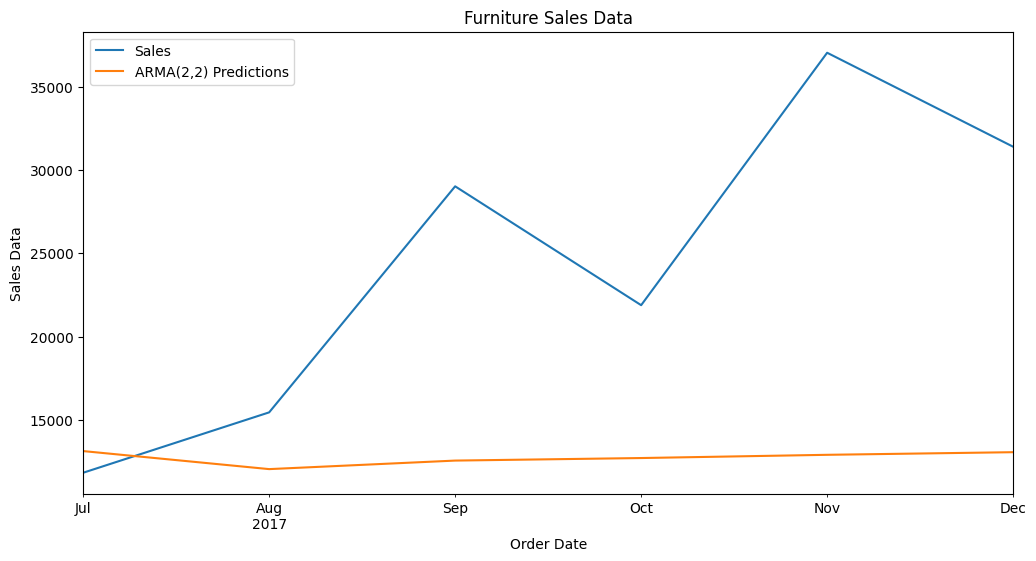

In [14]:
title = 'Furniture Sales Data'
ylabel='Sales Data'
xlabel='Order Date' # we don't really need a label here

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

Autoregressive Integreted Moving Average(ARIMA)
It's a more comprehensive and flexible time series modeling approach compared to the ARMA model. ARIMA models are used for analyzing, forecasting, and understanding time series data that might exhibit trends, seasonality, and other complex patterns.

ARIMA models are built on three main components:

AutoRegressive (AR) Component: Similar to the AR component in ARMA models, this part models the relationship between the current value and past values of the time series. It captures the effect of previous observations on the current one.

Integrated (I) Component: The "I" in ARIMA stands for "Integrated." This component accounts for differencing the series to achieve stationarity. Many time series datasets are non-stationary, meaning they have trends, seasonality, or other patterns that change over time. Differencing involves subtracting the previous observation from the current observation to remove trends and make the series stationary.

Moving Average (MA) Component: Similar to the MA component in ARMA models, this part models the relationship between the current value and past error terms. It captures the influence of past forecast errors on the current value.

An ARIMA(p, d, q) model is defined by these three components:

 p represents the order of the AutoRegressive (AR) component.
 d represents the degree of differencing required to make the series stationary.
 q represents the order of the Moving Average (MA) component.

In [15]:
#plot the sales data of Office Supplies
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [16]:
df = df.resample('MS').sum()

In [17]:
df.head()

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


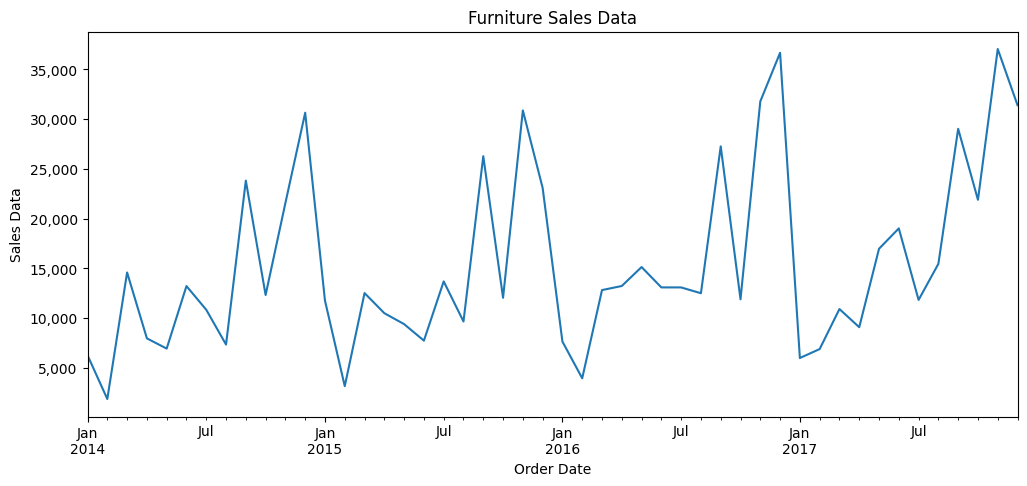

In [18]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title = 'Furniture Sales Data'
ylabel='Sales Data'
xlabel='Order Date' 

ax = df['Sales'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

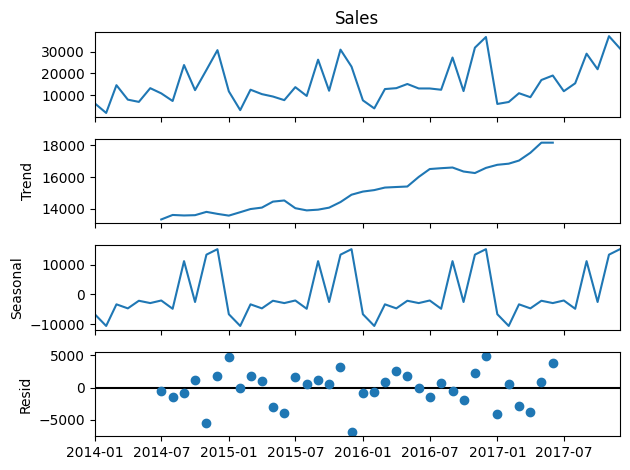

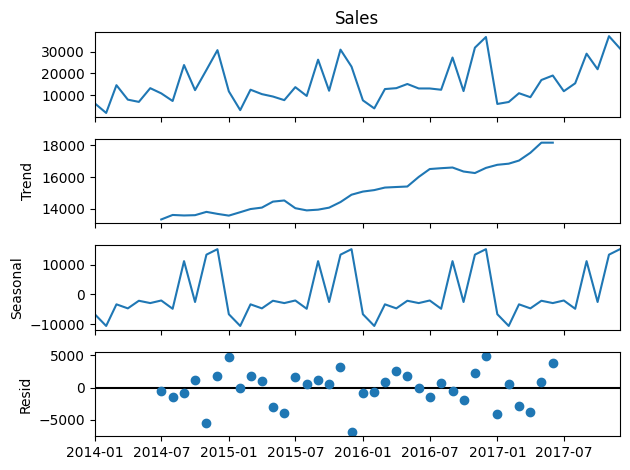

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'], model='additive')  # model='add' also works
result.plot()

In [20]:
from statsmodels.tsa.statespace.tools import diff

df['d1'] = diff(df['Sales'], k_diff=1)

adf_test(df['d1'], 'Furniture Sales Data')

Augmented Dickey-Fuller Test: Furniture Sales Data
ADF test statistic     -1.147459e+01
p-value                 5.167971e-21
# lags used             1.000000e+01
# observations          3.600000e+01
critical value (1%)    -3.626652e+00
critical value (5%)    -2.945951e+00
critical value (10%)   -2.611671e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Run the ACF and PACF plots
A PACF Plot can reveal recommended AR(p) orders, and an ACF Plot can do the same for MA(q) orders.
Alternatively, we can compare the stepwise Akaike Information Criterion (AIC) values across a set of different (p,q) combinations to choose the best combination.

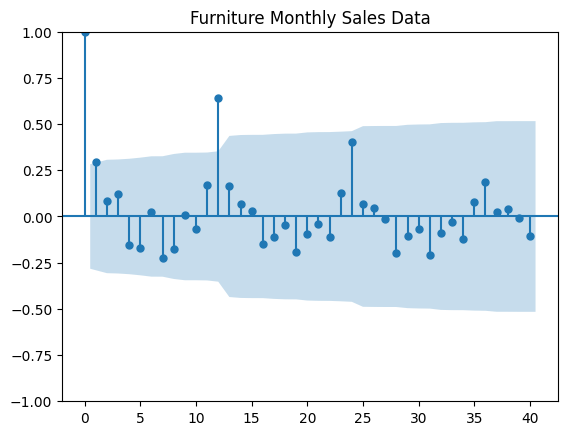

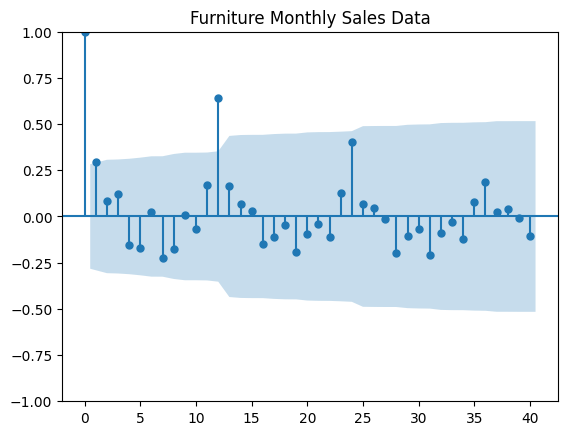

In [21]:
title = 'Furniture Monthly Sales Data'
lags = 40
plot_acf(df['Sales'],title=title,lags=lags)

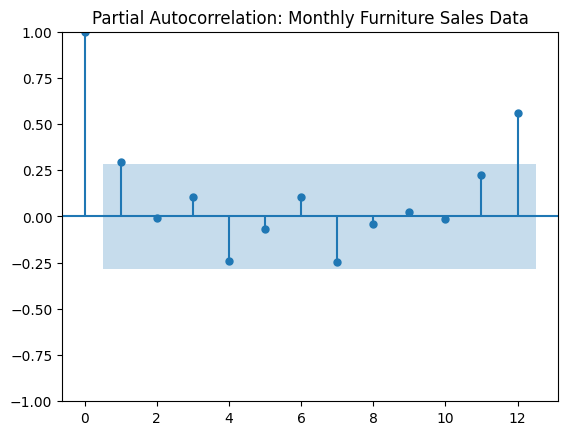

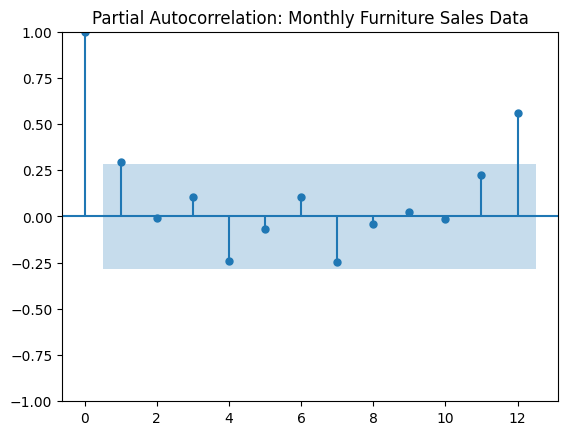

In [22]:
title = 'Partial Autocorrelation: Monthly Furniture Sales Data'
lags = 12
plot_pacf(df['Sales'],title=title,lags=lags)

In [23]:
#Split the data
n = len(df)
test_size = 12
train = df.iloc[:n-test_size]
test = df.iloc[n-test_size:]

In [24]:
model = ARIMA(train['Sales'], order=(1, 0, 0))

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -376.058
Date:                Sun, 06 Apr 2025   AIC                            758.116
Time:                        17:01:01   BIC                            762.867
Sample:                    01-01-2014   HQIC                           759.774
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.463e+04   1934.689      7.561      0.000    1.08e+04    1.84e+04
ar.L1          0.2825      0.170      1.658      0.097      -0.051       0.616
sigma2      6.929e+07      0.134   5.15e+08      0.000    6.93e+07    6.93e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.92   Prob(JB):                         0.11
Heteroskedasticity (H):               1.40   Skew:                             0.83
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+24. Standard errors may be unstable.
"""

In [25]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,0,0) Predictions')
predictions

2017-01-01    20856.524035
2017-02-01    16387.395968
2017-03-01    15125.048311
2017-04-01    14768.486230
2017-05-01    14667.771885
2017-06-01    14639.324162
2017-07-01    14631.288832
2017-08-01    14629.019177
2017-09-01    14628.378091
2017-10-01    14628.197011
2017-11-01    14628.145863
2017-12-01    14628.131415
Freq: MS, Name: ARIMA(1,0,0) Predictions, dtype: float64

assing dynamic=False means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing typ='levels' predicts the levels of the original endogenous variables. If we'd used the default typ='linear' we would have seen linear predictions in terms of the differenced endogenous variables.

In [26]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Sales'][i]}")

predicted=20856.52404, expected=5964.032
predicted=16387.39597, expected=6866.3374
predicted=15125.04831, expected=10893.4448
predicted=14768.48623, expected=9065.9581
predicted=14667.77188, expected=16957.5582
predicted=14639.32416, expected=19008.5867
predicted=14631.28883, expected=11813.021999999999
predicted=14629.01918, expected=15441.874
predicted=14628.37809, expected=29028.206000000002
predicted=14628.19701, expected=21884.0682
predicted=14628.14586, expected=37056.715
predicted=14628.13142, expected=31407.4668


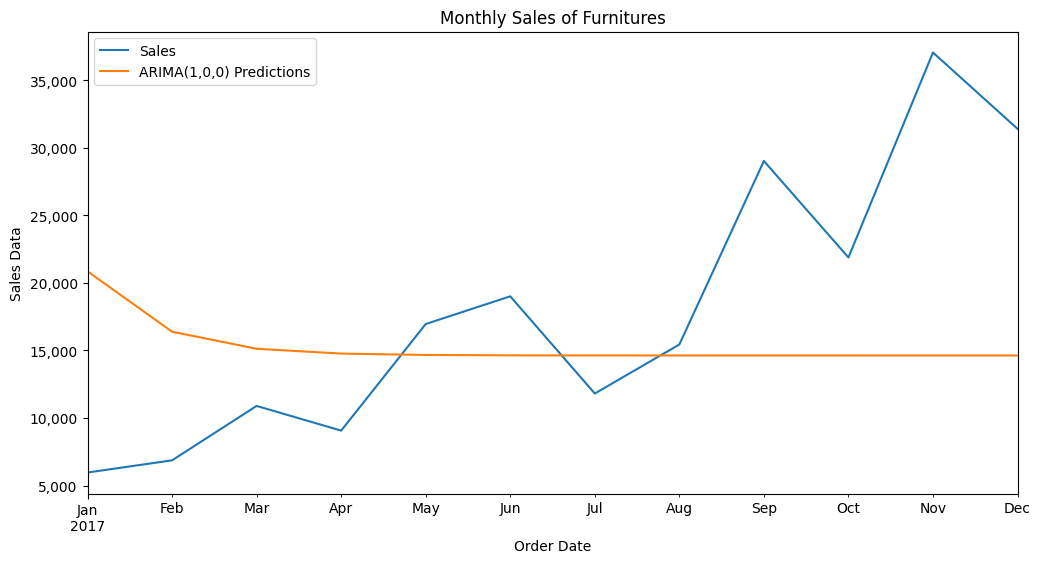

In [27]:
# Plot predictions against known values
title = 'Monthly Sales of Furnitures'
ylabel='Sales Data'
xlabel='Order Date'

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)

In [28]:
#Evaluate the Model
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Sales'], predictions)
print(f'ARIMA(1,0,0) MSE Error: {error:11.10}')

ARIMA(1,0,0) MSE Error: 120032385.7


In [29]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Sales'], predictions)
print(f'ARIMA(1,0,0) RMSE Error: {error:11.10}')

ARIMA(1,0,0) RMSE Error: 10955.92925


In [30]:
model = ARIMA(df['Sales'],order=(1,1,1))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('ARIMA(1,1,1) Forecast')

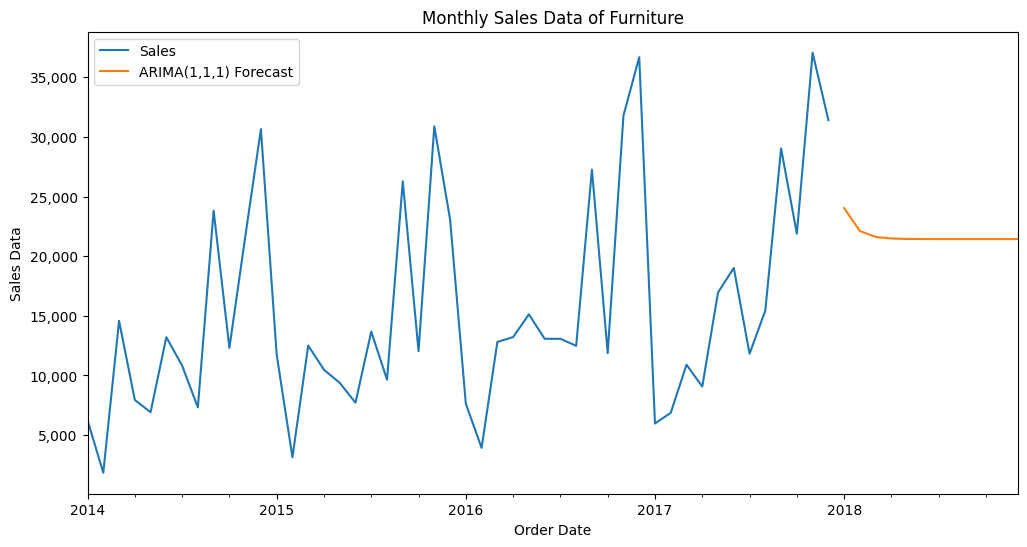

In [31]:
# Plot predictions against known values
title = 'Monthly Sales Data of Furniture'
ylabel='Sales Data'
xlabel='Order Date'

ax = df['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)

SARIMAX can be used just like SARIMA for modeling seasonal time series, but if you do not use the exog argument (as in your example), the model functions just like SARIMA.

The key difference is that SARIMAX provides additional functionality to model the effect of external variables, but if exog is not provided, it effectively behaves like a SARIMA model.

In your case, even though you're using SARIMAX, since you're not incorporating any exogenous variables (exog), it's behaving just like a SARIMA model with the specified seasonal and non-seasonal orders.

In [32]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
#plot the sales data of Office Supplies
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [34]:
df = df.resample('MS').sum()

<Axes: xlabel='Order Date'>

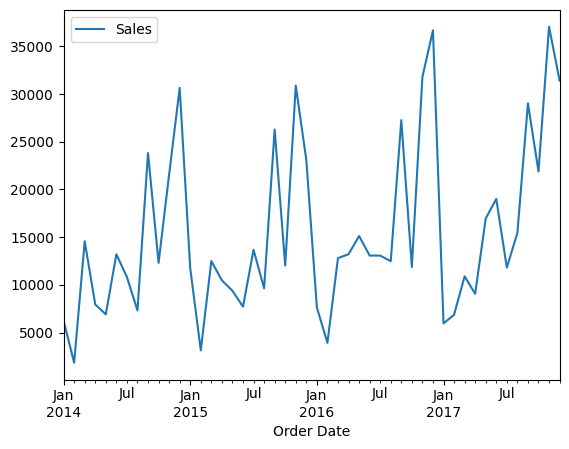

In [35]:
df.plot()

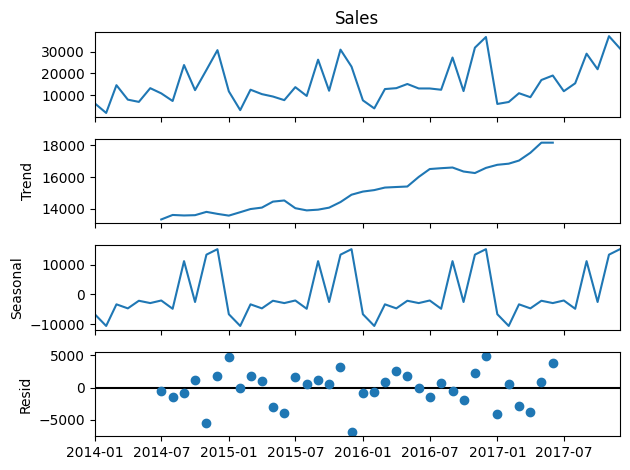

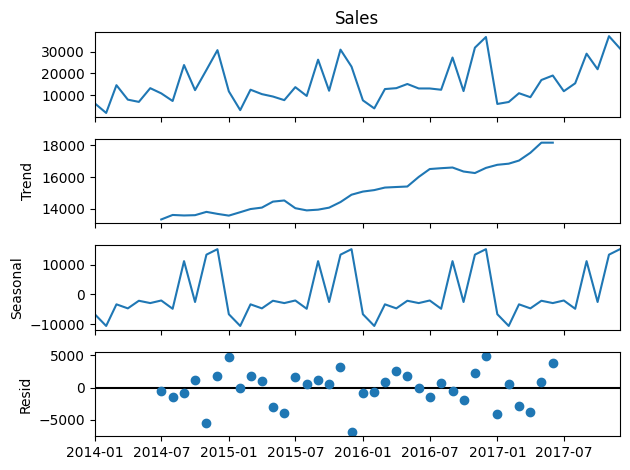

In [36]:
result = seasonal_decompose(df['Sales'], model='add')
result.plot()

In [37]:
# Set one year for testing
train = df.iloc[:len(df)-6]
test = df.iloc[len(df)-6:]

In [38]:
train

,Sales
Order Date,
2014-01-01,6242.5250
2014-02-01,1839.6580
2014-03-01,14573.9560
2014-04-01,7944.8370
2014-05-01,6912.7870
2014-06-01,13206.1256
2014-07-01,10821.0510
2014-08-01,7320.3465
2014-09-01,23816.4808


In [39]:
test

,Sales
Order Date,
2017-07-01,11813.0220
2017-08-01,15441.8740
2017-09-01,29028.2060
2017-10-01,21884.0682
2017-11-01,37056.7150
2017-12-01,31407.4668


In [40]:
#Fit the model
model = SARIMAX(train['Sales'],order=(0,1,3),seasonal_order=(2,1,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   42
Model:             SARIMAX(0, 1, 3)x(2, 1, [], 12)   Log Likelihood                -289.730
Date:                             Sun, 06 Apr 2025   AIC                            591.461
Time:                                     17:10:07   BIC                            599.664
Sample:                                 01-01-2014   HQIC                           594.030
                                      - 06-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3976      0.146     -2.722      0.006      -0.684      -0.111
ma.L2         -0.1639      0.156     -1.053      0.292      -0.469       0.141
ma.L3         -0.1625      0.167     -0.972      0.331      -0.490       0.165
ar.S.L12      -0.1664      0.118     -1.404      0.160      -0.399       0.066
ar.S.L24       0.2224      0.130      1.710      0.087      -0.033       0.477
sigma2      2.461e+07   5.24e-10    4.7e+16      0.000    2.46e+07    2.46e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.15   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.14   Prob(JB):                         0.65
Heteroskedasticity (H):               0.75   Skew:                             0.17
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.43e+33. Standard errors may be unstable.
"""

In [41]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Predictions')

In [42]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Sales'][i]}")

predicted=18982.66877, expected=11813.021999999999
predicted=15746.93545, expected=15441.874
predicted=29761.95657, expected=29028.206000000002
predicted=13953.797  , expected=21884.0682
predicted=35822.90086, expected=37056.715
predicted=34853.24127, expected=31407.4668


[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Sales Data')]

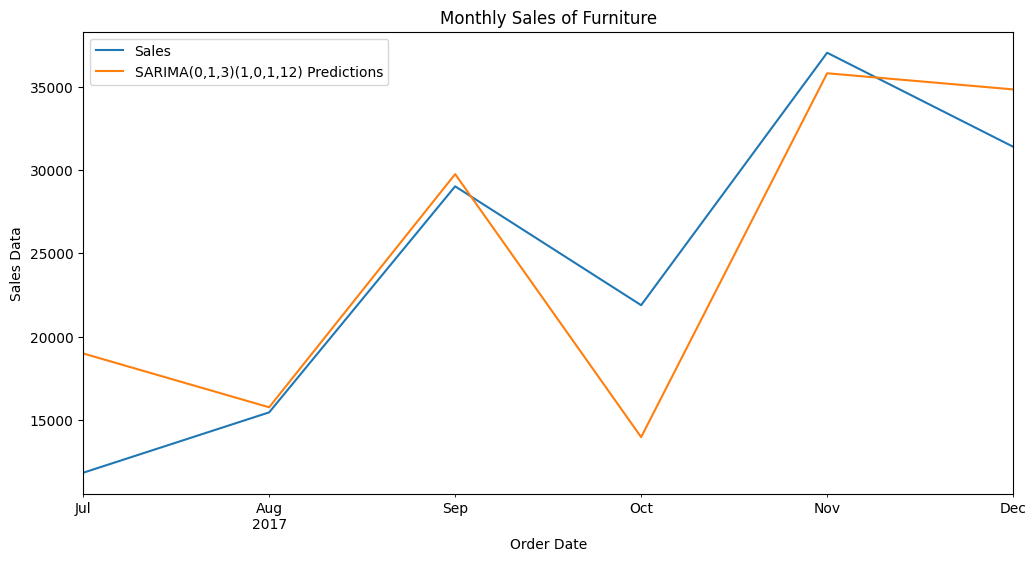

In [43]:
#Plot the predictions
# Plot predictions against known values
title = 'Monthly Sales of Furniture'
ylabel='Sales Data'
xlabel='Order Date'

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [44]:
from sklearn.metrics import mean_squared_error


error = mean_squared_error(test['Sales'], predictions)
print(f'SARIMA(2,0,1,12) MSE Error: {error:11.10}')

SARIMA(2,0,1,12) MSE Error: 21386691.26


In [45]:
#Let's retrain the model on whole data and forecast the future values.

model = SARIMAX(df['Sales'],order=(1,0,2),seasonal_order=(2,1,0,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+12,typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Forecast')

[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Sales Data')]

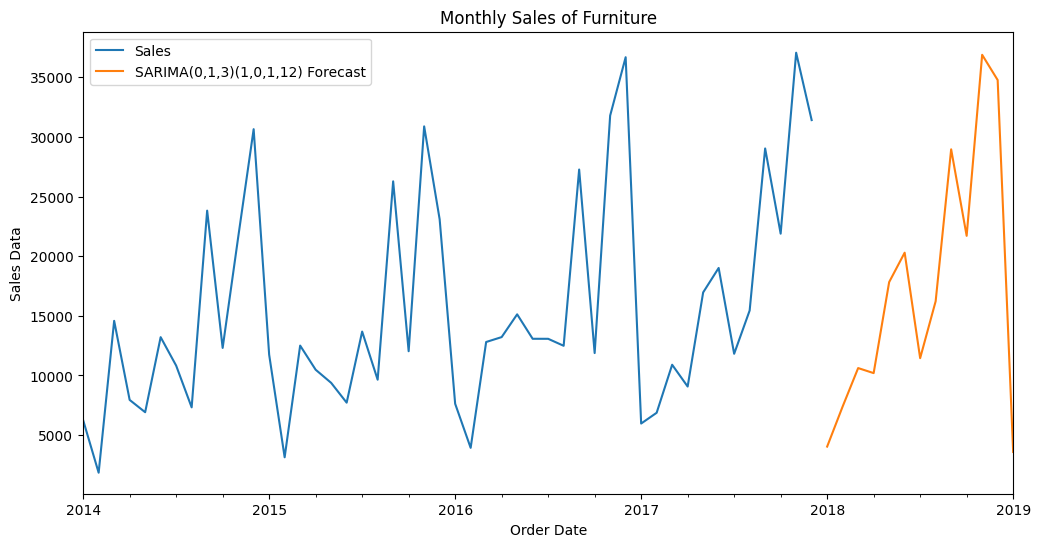

In [46]:
# Plot predictions against known values
# Plot predictions against known values
title = 'Monthly Sales of Furniture'
ylabel='Sales Data'
xlabel='Order Date'

ax = df['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [47]:
#plot the sales data of Office Supplies
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum, 'Quantity':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales,Quantity
Order Date,,
2014-01-06,2573.820,9
2014-01-07,76.728,3
2014-01-10,51.940,1
2014-01-11,9.940,2


In [48]:
df = df.resample('W').sum()

df.head()

,Sales,Quantity
Order Date,,
2014-01-12,2712.428,15
2014-01-19,1250.473,24
2014-01-26,1655.958,26
2014-02-02,623.666,5
2014-02-09,14.560,2


<Axes: xlabel='Order Date'>

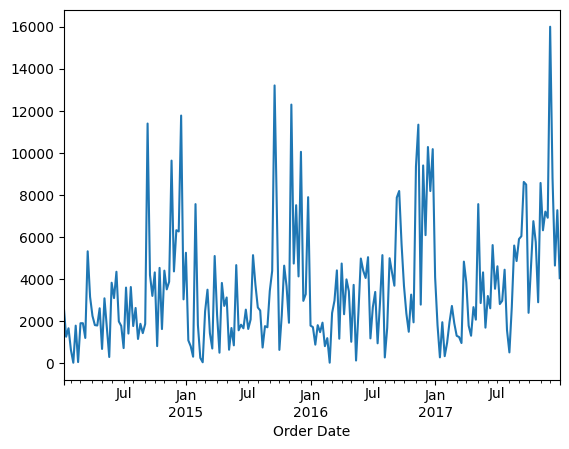

In [49]:
df['Sales'].plot()

<Axes: xlabel='Order Date'>

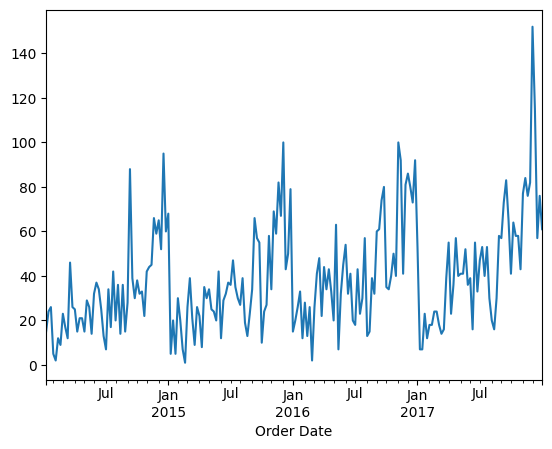

In [50]:
df['Quantity'].plot()

Here we can treat Quantity as exogenous variable

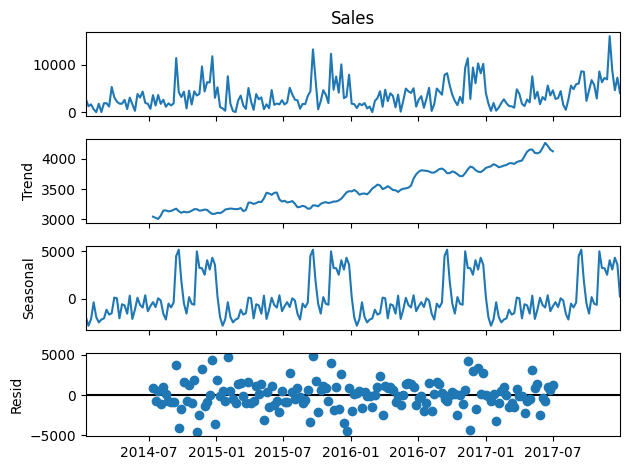

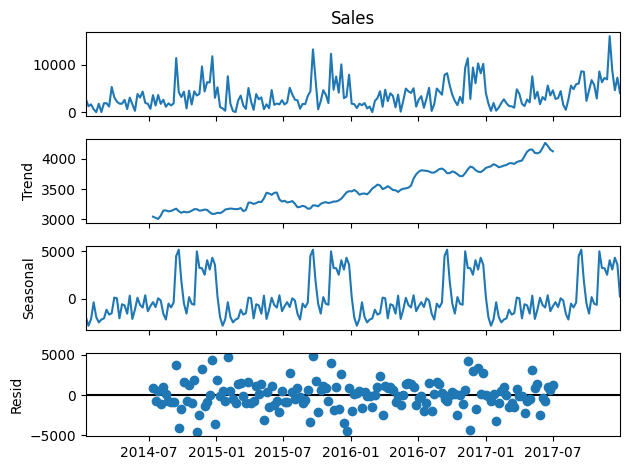

In [51]:
result_sales = seasonal_decompose(df['Sales'])

result_sales.plot()

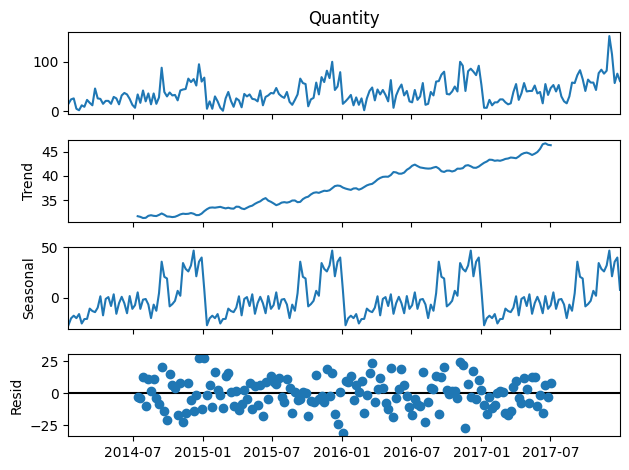

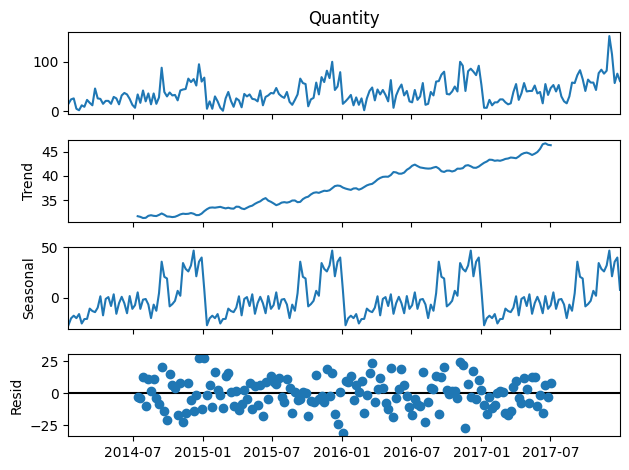

In [52]:
result_sales = seasonal_decompose(df['Quantity'])

result_sales.plot()

In [53]:
adf_test(df['Sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.444275
p-value                   0.009539
# lags used               6.000000
# observations          201.000000
critical value (1%)      -3.463309
critical value (5%)      -2.876029
critical value (10%)     -2.574493
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [54]:
adf_test(df['Quantity'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.457632
p-value                   0.000234
# lags used               4.000000
# observations          203.000000
critical value (1%)      -3.462980
critical value (5%)      -2.875885
critical value (10%)     -2.574416
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [55]:
df.columns

Index(['Sales', 'Quantity'], dtype='object')

In [57]:
train = df.iloc[:170]
test = df.iloc[170:]

In [58]:
model = SARIMAX(train['Sales'],exog=train['Quantity'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                  170
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -1466.114
Date:                           Sun, 06 Apr 2025   AIC                           2942.229
Time:                                   17:19:37   BIC                           2957.908
Sample:                               01-12-2014   HQIC                          2948.591
                                    - 04-09-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Quantity      97.6600      2.403     40.643      0.000      92.950     102.369
ar.L1         -0.0783      0.072     -1.086      0.277      -0.220       0.063
ar.S.L7        0.2222      0.057      3.874      0.000       0.110       0.335
ar.S.L14      -0.0828      0.094     -0.879      0.379      -0.267       0.102
sigma2      1.903e+06   1.58e+05     12.024      0.000    1.59e+06    2.21e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               295.39
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             1.56
Prob(H) (two-sided):                  0.58   Kurtosis:                         8.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

1. SARIMAX Components
train['Sales']: The target time series you're trying to predict (dependent variable).

exog=train['Quantity']: This is the exogenous variable you're including in the model. Exogenous variables are external factors that you think may have an effect on the target variable. In this case, you're using the Quantity data as an external factor that might influence Sales.

2. Non-Seasonal Parameters:
order=(1,0,0):

AR(1): This indicates you're using 1 autoregressive term. AR(1) means that the current value of the time series is influenced by the previous value (lag 1).

I(0): This means you're not applying any differencing to the time series (i.e., the series is assumed to be stationary, or no trend is removed).

MA(0): This means you're not using any moving average terms. The model will not account for past forecast errors in predicting future values.

3. Seasonal Parameters:
seasonal_order=(2,0,0,7):

SAR(2): This means you're including 2 seasonal autoregressive terms. These terms model the relationship between the current value and the previous seasonal values (lags 1 and 2).

SD(0): No seasonal differencing is applied, meaning no adjustment is made for seasonality through differencing.

SMA(0): No seasonal moving average terms are included.

7: This represents the seasonal period. For example, if the data is weekly, this would represent a yearly seasonality because there are roughly 52 weeks in a year, and you have weekly data. A value of 7 suggests weekly seasonality.

4. enforce_invertibility=False:
The enforce_invertibility parameter is used to control the invertibility of the model. Invertibility refers to the ability of the model's moving average (MA) terms to be represented in a stable way.

When enforce_invertibility=True, the model enforces that the MA parameters are invertible (i.e., they must satisfy certain mathematical conditions for the model to be stable and reliable).

By setting enforce_invertibility=False, you're allowing the model to fit the data even if the invertibility condition isn't met. This can be useful when you're unsure about the invertibility or when fitting non-standard models.



In [59]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['Quantity']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(1,0,0)(2,0,0,7) Predictions')

[Text(0.5, 0, ''), Text(0, 0.5, 'sales')]

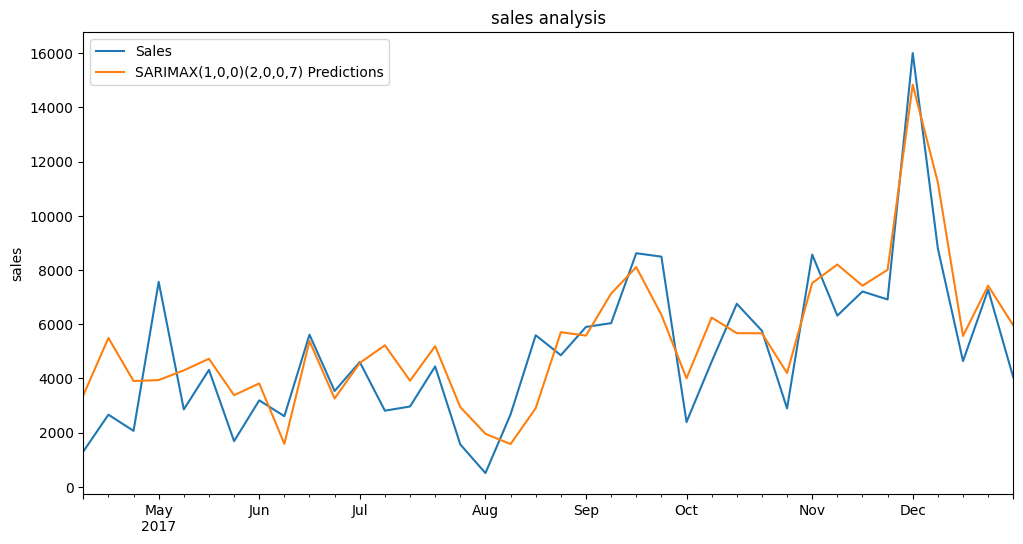

In [60]:
# Plot predictions against known values
title='sales analysis'
ylabel='sales'
xlabel=''

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [62]:
#Retrain the model on the full data, and forecast the future
#We're going to forecast 39 days into the future, and use the additional holiday data

model = SARIMAX(df['Sales'],exog=df['Quantity'],order=(1,2,1),seasonal_order=(1,2,2,7),enforce_invertibility=False)
results = model.fit()
exog_forecast = df[169:][['Quantity']]
fcast = results.predict(len(df),len(df)+38,exog=exog_forecast).rename('SARIMAX(1,0,0)(2,0,0,7) Forecast')

[Text(0.5, 0, ''), Text(0, 0.5, 'sales')]

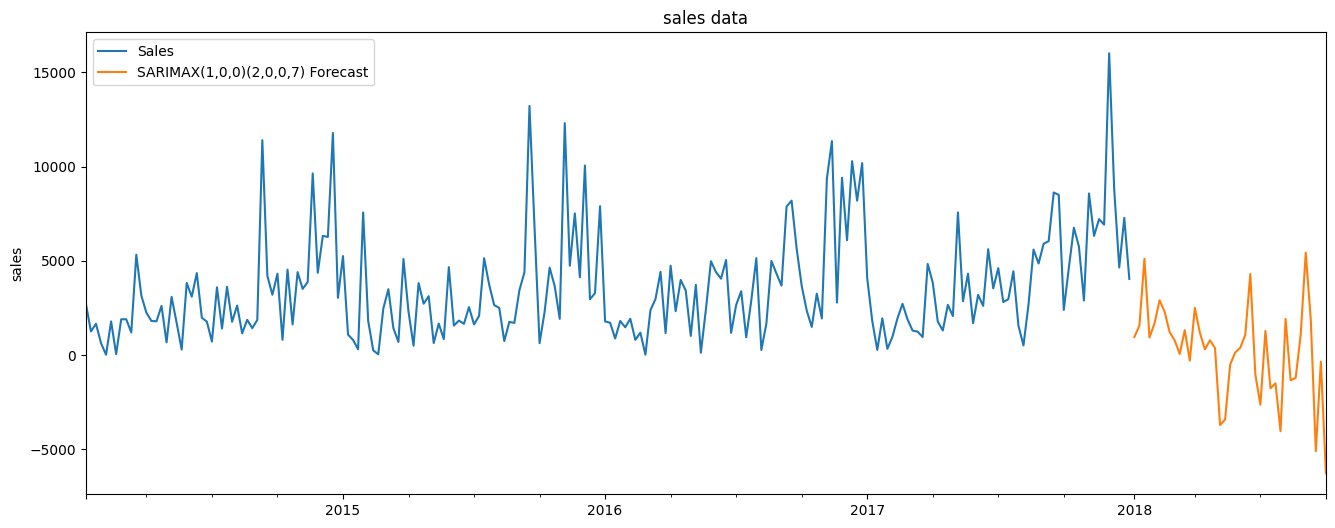

In [64]:
# Plot the forecast alongside historical values
title='sales data'
ylabel='sales'
xlabel=''

ax = df['Sales'].plot(legend=True,figsize=(16,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)